In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import random

%matplotlib inline 

## Function and Gradient update.

The function is defined as:

$f(x,y) = \frac{50}{9}(x^2+y^2)^3 - \frac{209}{18}(x^2+y^2)^2 + \frac{59}{9}(x^2+y^2)$

Gradients with respect to x and y are:

$\nabla_x f(x,y) = \frac{100}{3}x(x^2+y^2)^2 - \frac{418}{9}x(x^2+y^2) + \frac{118}{9}x$

$\nabla_y f(x,y) = \frac{100}{3}y(x^2+y^2)^2 - \frac{418}{9}y(x^2+y^2) + \frac{118}{9}y$



In [5]:
def gradient_descent(eta, max_epochs=1000):
    counter = 0
    convergence = True
    
    x, y = np.random.randint(-50, 50, 2)
    J = 50.0/9 * (x**2 + y**2)**3 - 209.0/18 * (x**2 + y**2)**2 + 59.0/9 * (x**2 + y**2)

    delta_J = J
    
    print("Epoch {} - Error:{}, a:{}, b:{}".format(counter, J, x, y))
    
    errors = [(J, x, y)]
    while J > 0.001:

        d_J_x = 100.0/3 * x * (x**2 + y**2)**2 - 418.0/9 * x * (x**2 + y**2) + 118.0/9 * x
        d_J_y = 100.0/3 * y * (x**2 + y**2)**2 - 418.0/9 * y * (x**2 + y**2) + 118.0/9 * y

        x -= eta * d_J_x
        y -= eta * d_J_y
        
        J_new = 50.0/9 * (x**2 + y**2)**3 - 209.0/18 * (x**2 + y**2)**2 + 59.0/9 * (x**2 + y**2)
        delta_J = J - J_new
        
        J = J_new
        
        counter += 1
        
        if counter > max_epochs:
            convergence = False
            break
        
        if counter % 1000 == 0:
            errors.append((J, x, y))
            print("Epoch {} - Error:{}, a:{}, b:{}".format(counter, J, x, y))
    
    return convergence, errors

In [6]:
def create_contour_plot(errors):
    a, b = [x[1] for x in errors], [x[2] for x in errors]
    A = np.linspace(min(a) - 5, max(a) + 5, 1000)
    B = np.linspace(min(b) - 5, max(b) + 5, 1000)

    A, B = np.meshgrid(A, B)

    Z = A**2 + 100*(B-A**2)**2
    
    
    fig = plt.figure(figsize=(16, 12))
    ax = fig.gca()

    ax.contourf(A, B, Z)
#     ax.plot(a, b)
#     ax.scatter(a, b)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Error Contours and GD updates')
    
    for i in range(len(a)-1):
        ax.arrow(a[i], b[i], a[i+1]-a[i], b[i+1]-b[i], head_width=0.5, head_length=0.5, fc='k', ec='k')
    
    plt.show()
    

In [23]:
c, errors = gradient_descent(2.5e-8, max_epochs=2000000)

Epoch 0 - Error:7320143570.277779, a:29, b:16
Epoch 1000 - Error:0.01757245157768376, a:-0.045440504294567426, b:-0.025070623059072882
Epoch 2000 - Error:0.01756109972001936, a:-0.04542575408503357, b:-0.025062485012433546
Epoch 3000 - Error:0.01754975508964679, a:-0.045411008571693244, b:-0.025054349556797532
Epoch 4000 - Error:0.017538417682101928, a:-0.04539626775314051, b:-0.025046216691389164
Epoch 5000 - Error:0.017527087492923085, a:-0.04538153162796965, b:-0.02503808641543284
Epoch 6000 - Error:0.017515764517651092, a:-0.04536680019477509, b:-0.02502995872815318
Epoch 7000 - Error:0.01750444875182956, a:-0.04535207345215202, b:-0.02502183362877491
Epoch 8000 - Error:0.017493140191004588, a:-0.045337351398695665, b:-0.025013711116523146
Epoch 9000 - Error:0.017481838830724766, a:-0.04532263403300161, b:-0.02500559119062298
Epoch 10000 - Error:0.017470544666541313, a:-0.04530792135366576, b:-0.02499747385029976
Epoch 11000 - Error:0.01745925769400807, a:-0.045293213359284434, b:-

Epoch 113000 - Error:0.016344966734600556, a:-0.043817353975161344, b:-0.024175091848366383
Epoch 114000 - Error:0.016334397164248716, a:-0.04380312107548502, b:-0.024167239214062212
Epoch 115000 - Error:0.016323834336947802, a:-0.043788892716602475, b:-0.024159389085023623
Epoch 116000 - Error:0.016313278248514765, a:-0.04377466889714512, b:-0.024151541460495397
Epoch 117000 - Error:0.016302728894769067, a:-0.043760449615744657, b:-0.024143696339722756
Epoch 118000 - Error:0.016292186271532533, a:-0.043746234871033136, b:-0.0241358537219509
Epoch 119000 - Error:0.01628165037462949, a:-0.043732024661642964, b:-0.024128013606425296
Epoch 120000 - Error:0.01627112119988667, a:-0.04371781898620685, b:-0.02412017599239164
Epoch 121000 - Error:0.016260598743133244, a:-0.04370361784335789, b:-0.024112340879095653
Epoch 122000 - Error:0.016250083000200727, a:-0.04368942123172928, b:-0.024104508265783437
Epoch 123000 - Error:0.016239573966923368, a:-0.04367522914995513, b:-0.024096678151701103

Epoch 203000 - Error:0.015420226084792807, a:-0.04255441895330528, b:-0.023478300112170086
Epoch 204000 - Error:0.015410246919702556, a:-0.04254058928305663, b:-0.02347066994927443
Epoch 205000 - Error:0.015400274130825356, a:-0.04252676403176573, b:-0.023463042224424257
Epoch 206000 - Error:0.015390307714192853, a:-0.04251294319809374, b:-0.023455416936881027
Epoch 207000 - Error:0.01538034766583917, a:-0.04249912678070238, b:-0.0234477940859065
Epoch 208000 - Error:0.01537039398180084, a:-0.04248531477825389, b:-0.023440173670762492
Epoch 209000 - Error:0.015360446658116639, a:-0.04247150718941066, b:-0.023432555690711062
Epoch 210000 - Error:0.015350505690827694, a:-0.0424577040128355, b:-0.02342494014501438
Epoch 211000 - Error:0.01534057107597743, a:-0.04244390524719142, b:-0.023417327032934962
Epoch 212000 - Error:0.015330642809611793, a:-0.04243011089114218, b:-0.02340971635373534
Epoch 213000 - Error:0.0153207208877788, a:-0.04241632094335137, b:-0.023402108106678365
Epoch 2140

Epoch 294000 - Error:0.014537756756876068, a:-0.04131385287024718, b:-0.02279384985944804
Epoch 295000 - Error:0.014528341857619434, a:-0.041300419884313946, b:-0.0227864385568642
Epoch 296000 - Error:0.014518932982878041, a:-0.041286991196896106, b:-0.02277902962587506
Epoch 297000 - Error:0.01450953012889104, a:-0.04127356680668532, b:-0.022771623065758802
Epoch 298000 - Error:0.014500133291899996, a:-0.04126014671237397, b:-0.022764218875793725
Epoch 299000 - Error:0.014490742468148497, a:-0.04124673091265419, b:-0.022756817055258692
Epoch 300000 - Error:0.014481357653882436, a:-0.041233319406218834, b:-0.022749417603432305
Epoch 301000 - Error:0.014471978845349905, a:-0.04121991219176095, b:-0.022742020519593537
Epoch 302000 - Error:0.014462606038801385, a:-0.04120650926797424, b:-0.022734625803021526
Epoch 303000 - Error:0.014453239230489348, a:-0.04119311063355231, b:-0.02272723345299561
Epoch 304000 - Error:0.01444387841666854, a:-0.041179716287189215, b:-0.022719843468795266
Ep

Epoch 393000 - Error:0.013634325074670595, a:-0.040004635417028464, b:-0.02207152298870728
Epoch 394000 - Error:0.013625488703617834, a:-0.03999162168998064, b:-0.022064343001370522
Epoch 395000 - Error:0.013616657995378837, a:-0.039978612133543256, b:-0.022057165315060235
Epoch 396000 - Error:0.013607832946407624, a:-0.03996560674644093, b:-0.022049989929072793
Epoch 397000 - Error:0.013599013553160243, a:-0.03995260552739857, b:-0.022042816842704562
Epoch 398000 - Error:0.013590199812094904, a:-0.03993960847514134, b:-0.022035646055252333
Epoch 399000 - Error:0.013581391719671966, a:-0.0399266155883949, b:-0.02202847756601295
Epoch 400000 - Error:0.013572589272353844, a:-0.03991362686588513, b:-0.022021311374283457
Epoch 401000 - Error:0.013563792466605091, a:-0.03990064230633828, b:-0.02201414747936109
Epoch 402000 - Error:0.01355500129889236, a:-0.03988766190848094, b:-0.022006985880543246
Epoch 403000 - Error:0.013546215765684311, a:-0.039874685671039814, b:-0.021999826577127554
E

Epoch 485000 - Error:0.012844644016688164, a:-0.03882467145864221, b:-0.02142050839097693
Epoch 486000 - Error:0.012836314043110498, a:-0.03881203613026065, b:-0.02141353717531809
Epoch 487000 - Error:0.012827989414818167, a:-0.03879940485653019, b:-0.02140656819670815
Epoch 488000 - Error:0.012819670128454926, a:-0.03878677763620566, b:-0.021399601454460227
Epoch 489000 - Error:0.012811356180666597, a:-0.03877415446804246, b:-0.02139263694788742
Epoch 490000 - Error:0.012803047568100847, a:-0.03876153535079594, b:-0.02138567467630307
Epoch 491000 - Error:0.012794744287407532, a:-0.03874892028322204, b:-0.021378714639020874
Epoch 492000 - Error:0.012786446335238332, a:-0.0387363092640768, b:-0.02137175683535449
Epoch 493000 - Error:0.012778153708247048, a:-0.0387237022921167, b:-0.021364801264617914
Epoch 494000 - Error:0.01276986640308955, a:-0.038711099366098754, b:-0.021357847926125197
Epoch 495000 - Error:0.012761584416423511, a:-0.038698500484779866, b:-0.021350896819190626
Epoch 

Epoch 596000 - Error:0.011951917356401408, a:-0.037446629419232554, b:-0.020660209334750892
Epoch 597000 - Error:0.011944160659276871, a:-0.037434436627982105, b:-0.020653482277509284
Epoch 598000 - Error:0.011936408946935774, a:-0.03742224775516437, b:-0.02064675738216164
Epoch 599000 - Error:0.011928662216238601, a:-0.03741006279957037, b:-0.020640034648040817
Epoch 600000 - Error:0.011920920464047762, a:-0.03739788175999142, b:-0.020633314074480005
Epoch 601000 - Error:0.01191318368722757, a:-0.037385704635219195, b:-0.020626595660812565
Epoch 602000 - Error:0.011905451882644257, a:-0.03737353142404574, b:-0.020619879406372013
Epoch 603000 - Error:0.011897725047165842, a:-0.03736136212526326, b:-0.020613165310491992
Epoch 604000 - Error:0.011890003177662286, a:-0.037349196737664334, b:-0.020606453372506398
Epoch 605000 - Error:0.011882286271005517, a:-0.03733703526004205, b:-0.02059974359174929
Epoch 606000 - Error:0.011874574324069267, a:-0.03732487769118965, b:-0.02059303596755486

Epoch 705000 - Error:0.011135129138726375, a:-0.03614042705808341, b:-0.019939545963082506
Epoch 706000 - Error:0.011127897695950422, a:-0.03612865432768772, b:-0.019933050663554015
Epoch 707000 - Error:0.011120670906688872, a:-0.03611688538584371, b:-0.019926557454260734
Epoch 708000 - Error:0.011113448768002588, a:-0.03610512023137717, b:-0.01992006633455504
Epoch 709000 - Error:0.011106231276954323, a:-0.03609335886311451, b:-0.01991357730378937
Epoch 710000 - Error:0.011099018430608659, a:-0.03608160127988243, b:-0.019907090361316524
Epoch 711000 - Error:0.01109181022603195, a:-0.036069847480508066, b:-0.019900605506489248
Epoch 712000 - Error:0.011084606660292182, a:-0.036058097463818495, b:-0.019894122738660612
Epoch 713000 - Error:0.011077407730459447, a:-0.036046351228641804, b:-0.0198876420571838
Epoch 714000 - Error:0.01107021343360531, a:-0.036034608773805814, b:-0.019881163461412117
Epoch 715000 - Error:0.011063023766803284, a:-0.03602287009813886, b:-0.019874686950699307
E

Epoch 833000 - Error:0.010246343690779256, a:-0.03466391356274557, b:-0.019124917827723884
Epoch 834000 - Error:0.010239684608094025, a:-0.034652616333924205, b:-0.019118684873891453
Epoch 835000 - Error:0.01023302981689633, a:-0.03464132274597442, b:-0.019112453928815765
Epoch 836000 - Error:0.01022637931446769, a:-0.03463003279776301, b:-0.019106224991871514
Epoch 837000 - Error:0.010219733098091068, a:-0.03461874648815658, b:-0.019099998062433537
Epoch 838000 - Error:0.010213091165051365, a:-0.03460746381602267, b:-0.01909377313987692
Epoch 839000 - Error:0.010206453512635029, a:-0.0345961847802289, b:-0.01908755022357682
Epoch 840000 - Error:0.010199820138130032, a:-0.034584909379642856, b:-0.019081329312908693
Epoch 841000 - Error:0.01019319103882613, a:-0.034573637613132834, b:-0.01907511040724797
Epoch 842000 - Error:0.010186566212014735, a:-0.03456236947956734, b:-0.019068893505970425
Epoch 843000 - Error:0.01017994565498886, a:-0.03455110497781509, b:-0.01906267860845196
Epoch

Epoch 961000 - Error:0.009427951740585536, a:-0.03324707770084017, b:-0.018343215283223458
Epoch 962000 - Error:0.009421820428987133, a:-0.03323623739798715, b:-0.01833723442647699
Epoch 963000 - Error:0.00941569307408578, a:-0.033225400593465286, b:-0.018331255499844226
Epoch 964000 - Error:0.009409569673368036, a:-0.033214567286180885, b:-0.018325278502721785
Epoch 965000 - Error:0.009403450224321987, a:-0.03320373747504053, b:-0.018319303434506457
Epoch 966000 - Error:0.009397334724437325, a:-0.03319291115895129, b:-0.018313330294595167
Epoch 967000 - Error:0.009391223171205332, a:-0.033182088336820556, b:-0.0183073590823851
Epoch 968000 - Error:0.009385115562118658, a:-0.03317126900755576, b:-0.018301389797273474
Epoch 969000 - Error:0.00937901189467163, a:-0.033160453170064844, b:-0.018295422438657772
Epoch 970000 - Error:0.009372912166360079, a:-0.03314964082325598, b:-0.018289457005935723
Epoch 971000 - Error:0.009366816374681376, a:-0.03313883196603774, b:-0.01828349349850498
E

Epoch 1071000 - Error:0.008776694227247216, a:-0.03207538262127363, b:-0.017696762825532016
Epoch 1072000 - Error:0.00877098341268387, a:-0.03206492064451704, b:-0.0176909907004249
Epoch 1073000 - Error:0.008765276287413484, a:-0.03205446204762277, b:-0.01768522044006934
Epoch 1074000 - Error:0.0087595728490872, a:-0.032044006829530326, b:-0.017679452043880432
Epoch 1075000 - Error:0.008753873095357861, a:-0.032033554989180084, b:-0.017673685511273424
Epoch 1076000 - Error:0.008748177023879599, a:-0.03202310652551239, b:-0.017667920841663683
Epoch 1077000 - Error:0.008742484632308086, a:-0.032012661437468067, b:-0.017662158034466816
Epoch 1078000 - Error:0.00873679591830042, a:-0.032002219723988166, b:-0.01765639708909863
Epoch 1079000 - Error:0.008731110879515131, a:-0.031991781384014054, b:-0.017650638004975003
Epoch 1080000 - Error:0.008725429513612243, a:-0.031981346416487505, b:-0.017644880781511985
Epoch 1081000 - Error:0.00871975181825311, a:-0.03197091482035025, b:-0.0176391254

Epoch 1169000 - Error:0.008234217562083626, a:-0.031066013224645014, b:-0.01713986936532327
Epoch 1170000 - Error:0.00822885735238459, a:-0.031055877481139395, b:-0.017134277230975343
Epoch 1171000 - Error:0.008223500608571918, a:-0.03104574501502568, b:-0.01712868690484364
Epoch 1172000 - Error:0.008218147328435108, a:-0.031035615825272974, b:-0.017123098386359434
Epoch 1173000 - Error:0.008212797509765018, a:-0.031025489910850763, b:-0.017117511674954025
Epoch 1174000 - Error:0.008207451150353854, a:-0.031015367270728633, b:-0.017111926770059082
Epoch 1175000 - Error:0.008202108247995239, a:-0.031005247903876713, b:-0.017106343671106253
Epoch 1176000 - Error:0.00819676880048415, a:-0.030995131809265296, b:-0.017100762377527497
Epoch 1177000 - Error:0.0081914328056169, a:-0.03098501898586493, b:-0.017095182888754896
Epoch 1178000 - Error:0.008186100261191232, a:-0.03097490943264659, b:-0.01708960520422071
Epoch 1179000 - Error:0.008180771165006108, a:-0.030964803148581313, b:-0.017084

Epoch 1296000 - Error:0.007580478517931835, a:-0.029804655589295116, b:-0.016443947911336805
Epoch 1297000 - Error:0.007575541238146477, a:-0.02979492792463268, b:-0.016438580923936828
Epoch 1298000 - Error:0.007570607154213426, a:-0.029785203408790362, b:-0.016433215673816927
Epoch 1299000 - Error:0.007565676264089922, a:-0.02977548204077444, b:-0.01642785216042877
Epoch 1300000 - Error:0.007560748565734509, a:-0.029765763819591458, b:-0.01642249038322436
Epoch 1301000 - Error:0.007555824057106926, a:-0.029756048744248177, b:-0.016417130341655654
Epoch 1302000 - Error:0.0075509027361682825, a:-0.029746336813751828, b:-0.016411772035174865
Epoch 1303000 - Error:0.007545984600880855, a:-0.029736628027109687, b:-0.016406415463234385
Epoch 1304000 - Error:0.007541069649208314, a:-0.029726922383329614, b:-0.016401060625286748
Epoch 1305000 - Error:0.007536157879115463, a:-0.029717219881419475, b:-0.01639570752078458
Epoch 1306000 - Error:0.007531249288568481, a:-0.029707520520387623, b:-0.

Epoch 1386000 - Error:0.007148685960494953, a:-0.028941660784090818, b:-0.01596781284639679
Epoch 1387000 - Error:0.007144028273724274, a:-0.028932212567049986, b:-0.015962600036994935
Epoch 1388000 - Error:0.007139373603965364, a:-0.028922767410541193, b:-0.015957388916162503
Epoch 1389000 - Error:0.007134721949287047, a:-0.028913325313596548, b:-0.01595217948336548
Epoch 1390000 - Error:0.00713007330775925, a:-0.028903886275248217, b:-0.01594697173806989
Epoch 1391000 - Error:0.007125427677453198, a:-0.028894450294528858, b:-0.01594176567974199
Epoch 1392000 - Error:0.007120785056441284, a:-0.028885017370471302, b:-0.015936561307848224
Epoch 1393000 - Error:0.007116145442797076, a:-0.028875587502108665, b:-0.015931358621855036
Epoch 1394000 - Error:0.007111508834595359, a:-0.028866160688474297, b:-0.0159261576212292
Epoch 1395000 - Error:0.007106875229912153, a:-0.028856736928601984, b:-0.015920958305437504
Epoch 1396000 - Error:0.007102244626824646, a:-0.028847316221525594, b:-0.015

Epoch 1488000 - Error:0.006688816012598258, a:-0.02799354243877233, b:-0.015444713069669097
Epoch 1489000 - Error:0.006684456317373201, a:-0.027984401458183324, b:-0.015439669770033741
Epoch 1490000 - Error:0.00668009944826665, a:-0.02797526344083835, b:-0.015434628105291724
Epoch 1491000 - Error:0.006675745403466828, a:-0.027966128385798133, b:-0.015429588074924661
Epoch 1492000 - Error:0.006671394181163064, a:-0.02795699629212348, b:-0.01542454967841451
Epoch 1493000 - Error:0.006667045779545803, a:-0.027947867158875525, b:-0.015419512915243192
Epoch 1494000 - Error:0.0066627001968066375, a:-0.027938740985115652, b:-0.015414477784892933
Epoch 1495000 - Error:0.006658357431138283, a:-0.027929617769905556, b:-0.015409444286845968
Epoch 1496000 - Error:0.006654017480734581, a:-0.027920497512307154, b:-0.015404412420584756
Epoch 1497000 - Error:0.006649680343790567, a:-0.027911380211382775, b:-0.015399382185591965
Epoch 1498000 - Error:0.0066453460185022925, a:-0.02790226586619479, b:-0.

Epoch 1600000 - Error:0.006217691312499835, a:-0.026987959736946582, b:-0.014889908820385416
Epoch 1601000 - Error:0.006213637134905344, a:-0.026979144862997413, b:-0.014885045441654856
Epoch 1602000 - Error:0.0062095855874108406, a:-0.026970332848784993, b:-0.014880183640710067
Epoch 1603000 - Error:0.006205536668327517, a:-0.026961523693400512, b:-0.014875323417049642
Epoch 1604000 - Error:0.006201490375967657, a:-0.026952717395935487, b:-0.014870464770172374
Epoch 1605000 - Error:0.006197446708644564, a:-0.026943913955481624, b:-0.014865607699577158
Epoch 1606000 - Error:0.006193405664672608, a:-0.026935113371130907, b:-0.014860752204763029
Epoch 1607000 - Error:0.006189367242367304, a:-0.026926315641975833, b:-0.014855898285229194
Epoch 1608000 - Error:0.006185331440045119, a:-0.026917520767108856, b:-0.01485104594047502
Epoch 1609000 - Error:0.006181298256023641, a:-0.026908728745622872, b:-0.01484619517000001
Epoch 1610000 - Error:0.0061772676886214265, a:-0.02689993957661085, b:

Epoch 1710000 - Error:0.005787140802512533, a:-0.02603527314446118, b:-0.014364288631427908
Epoch 1711000 - Error:0.00578336603707311, a:-0.026026767451394733, b:-0.01435959583525329
Epoch 1712000 - Error:0.005779593722195034, a:-0.02601826451970603, b:-0.014354904562597403
Epoch 1713000 - Error:0.005775823856302557, a:-0.026009764348515662, b:-0.014350214812975132
Epoch 1714000 - Error:0.0057720564378209, a:-0.026001266936944465, b:-0.014345526585901373
Epoch 1715000 - Error:0.005768291465176312, a:-0.025992772284113615, b:-0.014340839880891213
Epoch 1716000 - Error:0.005764528936795975, a:-0.025984280389144368, b:-0.014336154697459934
Epoch 1717000 - Error:0.005760768851108101, a:-0.025975791251158408, b:-0.014331471035122834
Epoch 1718000 - Error:0.005757011206541879, a:-0.025967304869277584, b:-0.014326788893395481
Epoch 1719000 - Error:0.005753256001527468, a:-0.025958821242623963, b:-0.01432210827179354
Epoch 1720000 - Error:0.0057495032344961165, a:-0.025950340370320162, b:-0.01

Epoch 1808000 - Error:0.0054286251883787695, a:-0.025214707242195152, b:-0.013911562616384758
Epoch 1809000 - Error:0.005425083237301503, a:-0.02520646802406212, b:-0.013907016840863099
Epoch 1810000 - Error:0.00542154358699257, a:-0.025198231482365187, b:-0.013902472541995845
Epoch 1811000 - Error:0.005418006235970796, a:-0.02518999761625054, b:-0.013897929719311882
Epoch 1812000 - Error:0.005414471182755868, a:-0.02518176642486438, b:-0.013893388372340222
Epoch 1813000 - Error:0.0054109384258684765, a:-0.025173537907353404, b:-0.01388884850061001
Epoch 1814000 - Error:0.005407407963830228, a:-0.025165312062864452, b:-0.013884310103650582
Epoch 1815000 - Error:0.005403879795163625, a:-0.02515708889054456, b:-0.01387977318099136
Epoch 1816000 - Error:0.005400353918392171, a:-0.025148868389541206, b:-0.01387523773216191
Epoch 1817000 - Error:0.005396830332040267, a:-0.025140650559001994, b:-0.013870703756691999
Epoch 1818000 - Error:0.00539330903463323, a:-0.025132435398074773, b:-0.013

Epoch 1923000 - Error:0.005036023019574025, a:-0.024284532128614374, b:-0.013398362553719565
Epoch 1924000 - Error:0.005032736174816027, a:-0.024276595166304815, b:-0.01339398354003155
Epoch 1925000 - Error:0.005029451466486111, a:-0.02426866078390192, b:-0.013389605949740325
Epoch 1926000 - Error:0.005026168893207093, a:-0.024260728980580994, b:-0.013385229782390857
Epoch 1927000 - Error:0.005022888453602642, a:-0.02425279975551753, b:-0.013380855037528231
Epoch 1928000 - Error:0.0050196101462973135, a:-0.024244873107887276, b:-0.013376481714697745
Epoch 1929000 - Error:0.005016333969916526, a:-0.024236949036866247, b:-0.013372109813444765
Epoch 1930000 - Error:0.0050130599230865545, a:-0.024229027541630692, b:-0.013367739333314739
Epoch 1931000 - Error:0.005009788004434577, a:-0.024221108621357085, b:-0.013363370273853457
Epoch 1932000 - Error:0.005006518212588643, a:-0.024213192275222267, b:-0.013359002634606659
Epoch 1933000 - Error:0.005003250546177608, a:-0.02420527850240312, b:-

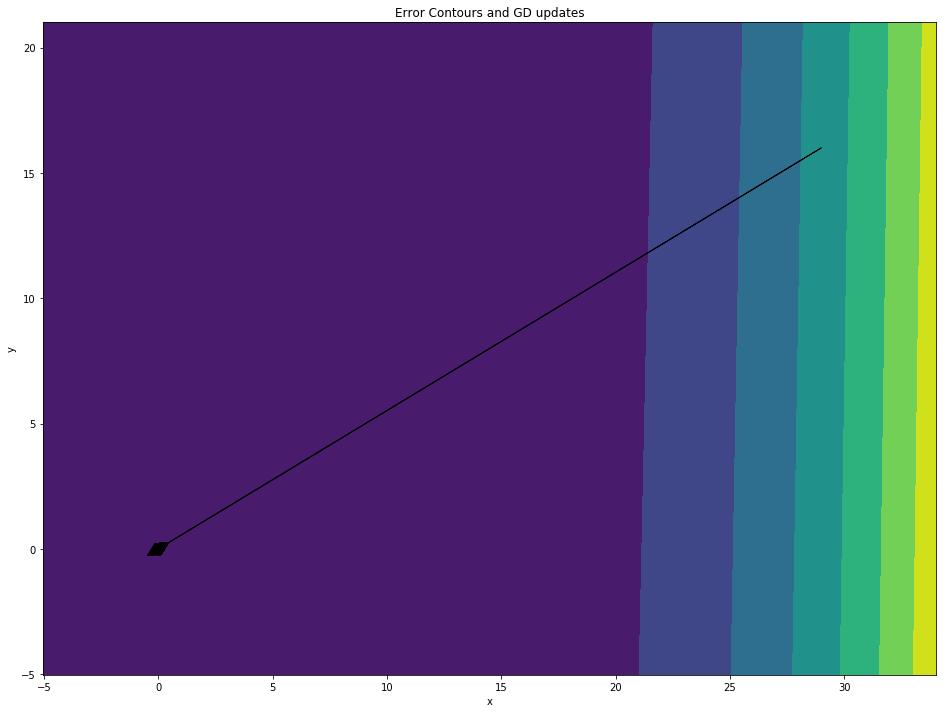

In [24]:
create_contour_plot(errors)

### Polyaks Momentum method

$v_{t+1} = \alpha v_t - \eta \nabla_\theta f(\theta_t) $

$\theta_{t+1} = \theta_t + v_{t+1}$

In [38]:
def gradient_descent_momentum(eta, alpha, max_epochs=1000):
    counter = 0
    convergence = True
    
    x, y = np.random.randint(-50, 50, 2)
    J = 50.0/9 * (x**2 + y**2)**3 - 209.0/18 * (x**2 + y**2)**2 + 59.0/9 * (x**2 + y**2)
    delta_J = J
    
    v_x_old = 0
    v_y_old = 0
    
    print("Epoch {} - Error:{}, a:{}, b:{}".format(counter, J, x, y))
    
    errors = [(J, x, y)]
    while J > 0.001:

        d_J_x = 100.0/3 * x * (x**2 + y**2)**2 - 418.0/9 * x * (x**2 + y**2) + 118.0/9 * x
        d_J_y = 100.0/3 * y * (x**2 + y**2)**2 - 418.0/9 * y * (x**2 + y**2) + 118.0/9 * y
    
        v_x = alpha * v_x_old - eta * d_J_x
        v_y = alpha * v_y_old - eta * d_J_y
        
        x += v_x
        y += v_y
        
        J_new = 50.0/9 * (x**2 + y**2)**3 - 209.0/18 * (x**2 + y**2)**2 + 59.0/9 * (x**2 + y**2)
        delta_J = J - J_new
        
        J = J_new
        
        v_x_old = v_x
        v_y_old = v_y
        
        counter += 1
        
        if counter > max_epochs:
            convergence = False
            break
        
        if counter % 1000 == 0:
            errors.append((J, x, y))
            print("Epoch {} - Error:{}, a:{}, b:{}".format(counter, J, x, y))
    
    return convergence, errors

In [39]:
c, errors = gradient_descent_momentum(1e-9, 0.98, 5000000)

Epoch 0 - Error:93239887644.94444, a:40, b:31
Epoch 1000 - Error:15.933170746998226, a:-1.161343216618186, b:-0.9000409928790916
Epoch 2000 - Error:15.441751168021797, a:-1.1574192635619336, b:-0.8969999292604948
Epoch 3000 - Error:14.97432953848624, a:-1.1535959395777164, b:-0.8940368531727257
Epoch 4000 - Error:14.528517258589067, a:-1.1498620733777274, b:-0.8911431068677329
Epoch 5000 - Error:14.102981274177562, a:-1.146214138700795, b:-0.8883159574931101
Epoch 6000 - Error:13.696491136643788, a:-1.1426488048104104, b:-0.8855528237280578
Epoch 7000 - Error:13.307909574350342, a:-1.1391629226039335, b:-0.8828512650180406
Epoch 8000 - Error:12.936184067290354, a:-1.1357535119188058, b:-0.8802089717370639
Epoch 9000 - Error:12.580339304088207, a:-1.1324177499149448, b:-0.8776237561840743
Epoch 10000 - Error:12.239470416685934, a:-1.1291529604266983, b:-0.8750935443306819
Epoch 11000 - Error:11.91273690186561, a:-1.1259566041894578, b:-0.8726163682468204
Epoch 12000 - Error:11.599357150

Epoch 109000 - Error:2.409811967824888, a:-0.9663443632082976, b:-0.7489168814864177
Epoch 110000 - Error:2.3853677283632386, a:-0.9654703417031257, b:-0.7482395148199078
Epoch 111000 - Error:2.3613507555245814, a:-0.9646039934897017, b:-0.7475680949545066
Epoch 112000 - Error:2.337751319989657, a:-0.9637452100497076, b:-0.7469025377885115
Epoch 113000 - Error:2.314559967754814, a:-0.9628938850272931, b:-0.7462427608961384
Epoch 114000 - Error:2.2917675108025115, a:-0.9620499141734522, b:-0.7455886834844122
Epoch 115000 - Error:2.2693650181399594, a:-0.9612131952921553, b:-0.744940226351405
Epoch 116000 - Error:2.2473438071896936, a:-0.9603836281881557, b:-0.7442973118458047
Epoch 117000 - Error:2.2256954355157674, a:-0.9595611146164277, b:-0.7436598638277152
Epoch 118000 - Error:2.204411692871261, a:-0.9587455582331693, b:-0.74302780763069
Epoch 119000 - Error:2.183484593552409, a:-0.9579368645483068, b:-0.7424010700249232
Epoch 120000 - Error:2.162906369045782, a:-0.9571349408794506,

Epoch 225000 - Error:1.0698841125560055, a:-0.8984751178670692, b:-0.6963182163469546
Epoch 226000 - Error:1.064961932710487, a:-0.8980829444378405, b:-0.696014281939301
Epoch 227000 - Error:1.0600941102325692, a:-0.8976929426301954, b:-0.6957120305383767
Epoch 228000 - Error:1.0552798877768534, a:-0.8973050940913045, b:-0.6954114479207353
Epoch 229000 - Error:1.0505185209380752, a:-0.8969193806852255, b:-0.6951125200310244
Epoch 230000 - Error:1.0458092779875159, a:-0.8965357844895857, b:-0.6948152329794023
Epoch 231000 - Error:1.041151439616062, a:-0.8961542877923443, b:-0.6945195730390399
Epoch 232000 - Error:1.0365442986829958, a:-0.8957748730886033, b:-0.6942255266436393
Epoch 233000 - Error:1.0319871599708819, a:-0.8953975230774779, b:-0.6939330803850189
Epoch 234000 - Error:1.0274793399460656, a:-0.895022220659032, b:-0.6936422210107235
Epoch 235000 - Error:1.0230201665248462, a:-0.8946489489312593, b:-0.6933529354216964
Epoch 236000 - Error:1.0186089788451085, a:-0.894277691187

Epoch 355000 - Error:0.7115090903991446, a:-0.8609172011702165, b:-0.6672108309068977
Epoch 356000 - Error:0.7100753932259245, a:-0.8607055538052939, b:-0.6670468041990824
Epoch 357000 - Error:0.7086534405631042, a:-0.8604947751440919, b:-0.6668834507366513
Epoch 358000 - Error:0.7072431152400096, a:-0.8602848600607915, b:-0.6667207665470921
Epoch 359000 - Error:0.7058443014941354, a:-0.8600758034712899, b:-0.6665587476902308
Epoch 360000 - Error:0.7044568849512789, a:-0.8598676003327838, b:-0.6663973902578878
Epoch 361000 - Error:0.7030807526057812, a:-0.8596602456433167, b:-0.6662366903735537
Epoch 362000 - Error:0.7017157928012407, a:-0.8594537344413714, b:-0.6660766441920465
Epoch 363000 - Error:0.7003618952114365, a:-0.8592480618054313, b:-0.6659172478991926
Epoch 364000 - Error:0.6990189508216451, a:-0.8590432228535752, b:-0.6657584977115018
Epoch 365000 - Error:0.6976868519102126, a:-0.8588392127430612, b:-0.665600389875851
Epoch 366000 - Error:0.6963654920304396, a:-0.858636026

Epoch 457000 - Error:0.6103205235746891, a:-0.8430708711348497, b:-0.6533799251295005
Epoch 458000 - Error:0.6096590061076155, a:-0.8429271077085608, b:-0.6532685084741273
Epoch 459000 - Error:0.609002118446961, a:-0.8427838482652255, b:-0.6531574824055418
Epoch 460000 - Error:0.6083498221433308, a:-0.842641090376342, b:-0.6530468450416568
Epoch 461000 - Error:0.6077020791261543, a:-0.8424988316293289, b:-0.652936594512721
Epoch 462000 - Error:0.6070588516993052, a:-0.8423570696273882, b:-0.6528267289612159
Epoch 463000 - Error:0.6064201025367622, a:-0.8422158019893652, b:-0.6527172465417485
Epoch 464000 - Error:0.6057857946783889, a:-0.8420750263496303, b:-0.6526081454209556
Epoch 465000 - Error:0.6051558915256949, a:-0.841934740357938, b:-0.6524994237773946
Epoch 466000 - Error:0.6045303568377145, a:-0.8417949416793041, b:-0.6523910798014529
Epoch 467000 - Error:0.6039091547268889, a:-0.8416556279938693, b:-0.6522831116952417
Epoch 468000 - Error:0.6032922496550661, a:-0.841516796996

Epoch 559000 - Error:0.5614024412569103, a:-0.830644096496175, b:-0.643749174784542
Epoch 560000 - Error:0.5610654539592659, a:-0.8305414886949071, b:-0.6436696537385593
Epoch 561000 - Error:0.56073056490676, a:-0.8304392008430356, b:-0.6435903806533589
Epoch 562000 - Error:0.5603977589644122, a:-0.8303372316257092, b:-0.6435113545099327
Epoch 563000 - Error:0.5600670211247243, a:-0.8302355797353091, b:-0.6434325742948712
Epoch 564000 - Error:0.5597383365063804, a:-0.8301342438713804, b:-0.6433540390003257
Epoch 565000 - Error:0.5594116903530502, a:-0.8300332227405948, b:-0.643275747623966
Epoch 566000 - Error:0.5590870680321647, a:-0.8299325150566975, b:-0.6431976991689476
Epoch 567000 - Error:0.5587644550336988, a:-0.8298321195404547, b:-0.6431198926438617
Epoch 568000 - Error:0.5584438369689746, a:-0.8297320349196081, b:-0.6430423270627035
Epoch 569000 - Error:0.5581251995695071, a:-0.8296322599288176, b:-0.642965001444842
Epoch 570000 - Error:0.5578085286858121, a:-0.82953279330962

Epoch 681000 - Error:0.5322163851907762, a:-0.8201536991929412, b:-0.6356191168745264
Epoch 682000 - Error:0.5320526703789588, a:-0.820082181367648, b:-0.635563690559923
Epoch 683000 - Error:0.5318898741127587, a:-0.8200108644587117, b:-0.6355084199554969
Epoch 684000 - Error:0.5317279905731684, a:-0.8199397477555304, b:-0.6354533045105326
Epoch 685000 - Error:0.5315670139833975, a:-0.8198688305507849, b:-0.6353983436768533
Epoch 686000 - Error:0.5314069386084963, a:-0.8197981121404115, b:-0.6353435369088126
Epoch 687000 - Error:0.5312477587550406, a:-0.81972759182359, b:-0.6352888836632758
Epoch 688000 - Error:0.5310894687707535, a:-0.8196572689027225, b:-0.6352343833996039
Epoch 689000 - Error:0.5309320630442, a:-0.8195871426834157, b:-0.63518003557964
Epoch 690000 - Error:0.5307755360044188, a:-0.8195172124744582, b:-0.6351258396676971
Epoch 691000 - Error:0.5306198821205861, a:-0.8194474775878027, b:-0.6350717951305385
Epoch 692000 - Error:0.530465095901719, a:-0.8193779373385531, 

Epoch 788000 - Error:0.5189386644300535, a:-0.813514737621067, b:-0.630473921656322
Epoch 789000 - Error:0.5188470980843292, a:-0.8134612520972331, b:-0.6304324703753499
Epoch 790000 - Error:0.518756011323414, a:-0.8134079068262179, b:-0.6303911277903121
Epoch 791000 - Error:0.5186654013663796, a:-0.8133547013612396, b:-0.6303498935549536
Epoch 792000 - Error:0.5185752654504618, a:-0.8133016352573309, b:-0.6303087673244234
Epoch 793000 - Error:0.5184856008309175, a:-0.8132487080713308, b:-0.6302677487552718
Epoch 794000 - Error:0.5183964047809031, a:-0.8131959193618732, b:-0.6302268375054412
Epoch 795000 - Error:0.5183076745913171, a:-0.8131432686893739, b:-0.6301860332342542
Epoch 796000 - Error:0.5182194075706903, a:-0.8130907556160323, b:-0.6301453356024156
Epoch 797000 - Error:0.5181316010450603, a:-0.8130383797058128, b:-0.6301047442719954
Epoch 798000 - Error:0.5180442523578153, a:-0.8129861405244379, b:-0.6300642589064291
Epoch 799000 - Error:0.5179573588695954, a:-0.81293403763

Epoch 917000 - Error:0.5102824948626736, a:-0.8076345750891917, b:-0.6259167956941094
Epoch 918000 - Error:0.5102349603250627, a:-0.8075960386810063, b:-0.625886929977765
Epoch 919000 - Error:0.5101876595481878, a:-0.8075575971458863, b:-0.6258571377880484
Epoch 920000 - Error:0.51014059128486, a:-0.807519250210494, b:-0.6258274189131204
Epoch 921000 - Error:0.5100937542952408, a:-0.8074809976024654, b:-0.6257977731418998
Epoch 922000 - Error:0.510047147346806, a:-0.8074428390504094, b:-0.6257682002640556
Epoch 923000 - Error:0.5100007692142716, a:-0.8074047742838952, b:-0.6257387000700076
Epoch 924000 - Error:0.5099546186795685, a:-0.8073668030334568, b:-0.6257092723509181
Epoch 925000 - Error:0.5099086945317852, a:-0.8073289250305846, b:-0.6256799168986911
Epoch 926000 - Error:0.5098629955671292, a:-0.8072911400077214, b:-0.6256506335059722
Epoch 927000 - Error:0.5098175205888662, a:-0.8072534476982608, b:-0.62562142196614
Epoch 928000 - Error:0.5097722684072892, a:-0.807215847836538

Epoch 1045000 - Error:0.5057396259520921, a:-0.8033890889826132, b:-0.6226265439615174
Epoch 1046000 - Error:0.5057139493288654, a:-0.803360766302677, b:-0.622604593884569
Epoch 1047000 - Error:0.5056883932020915, a:-0.8033325101584033, b:-0.6225826953727597
Epoch 1048000 - Error:0.5056629569683926, a:-0.8033043203724857, b:-0.6225608482886734
Epoch 1049000 - Error:0.5056376400276781, a:-0.8032761967681764, b:-0.6225390524953369
Epoch 1050000 - Error:0.5056124417831214, a:-0.803248139169306, b:-0.6225173078562127
Epoch 1051000 - Error:0.5055873616411297, a:-0.803220147400258, b:-0.6224956142351998
Epoch 1052000 - Error:0.505562399011338, a:-0.8031922212859776, b:-0.6224739714966314
Epoch 1053000 - Error:0.5055375533065893, a:-0.8031643606519746, b:-0.6224523795052798
Epoch 1054000 - Error:0.5055128239429081, a:-0.8031365653243089, b:-0.6224308381263405
Epoch 1055000 - Error:0.5054882103394753, a:-0.8031088351295986, b:-0.6224093472254394
Epoch 1056000 - Error:0.5054637119186296, a:-0.8

Epoch 1183000 - Error:0.5031175605108498, a:-0.8000409589134556, b:-0.620031743157913
Epoch 1184000 - Error:0.5031039740110401, a:-0.8000203564927317, b:-0.6200157762818531
Epoch 1185000 - Error:0.5030904489096208, a:-0.7999998006769181, b:-0.6199998455245989
Epoch 1186000 - Error:0.5030769849148067, a:-0.7999792913496752, b:-0.6199839507959859
Epoch 1187000 - Error:0.503063581736277, a:-0.7999588283949989, b:-0.6199680920061126
Epoch 1188000 - Error:0.5030502390851916, a:-0.7999384116972236, b:-0.6199522690653356
Epoch 1189000 - Error:0.5030369566741815, a:-0.7999180411410176, b:-0.6199364818842766
Epoch 1190000 - Error:0.5030237342173249, a:-0.7998977166113852, b:-0.6199207303738132
Epoch 1191000 - Error:0.5030105714301545, a:-0.7998774379936658, b:-0.6199050144450816
Epoch 1192000 - Error:0.5029974680296467, a:-0.7998572051735293, b:-0.6198893340094771
Epoch 1193000 - Error:0.5029844237342118, a:-0.7998370180369796, b:-0.6198736889786518
Epoch 1194000 - Error:0.5029714382636818, a:-

Epoch 1290000 - Error:0.5019609392517568, a:-0.7980793322260802, b:-0.6185114824752026
Epoch 1291000 - Error:0.5019525243184217, a:-0.7980631182600219, b:-0.6184989166515077
Epoch 1292000 - Error:0.5019441465682135, a:-0.7980469401561748, b:-0.6184863786210231
Epoch 1293000 - Error:0.5019358058299206, a:-0.7980307978285278, b:-0.6184738683170962
Epoch 1294000 - Error:0.5019275019331575, a:-0.7980146911913031, b:-0.6184613856732478
Epoch 1295000 - Error:0.5019192347083754, a:-0.7979986201589627, b:-0.618448930623183
Epoch 1296000 - Error:0.501911003986848, a:-0.7979825846462002, b:-0.6184365031007919
Epoch 1297000 - Error:0.5019028096006686, a:-0.7979665845679399, b:-0.6184241030401414
Epoch 1298000 - Error:0.5018946513827443, a:-0.7979506198393382, b:-0.6184117303754768
Epoch 1299000 - Error:0.5018865291668, a:-0.7979346903757889, b:-0.6183993850412263
Epoch 1300000 - Error:0.5018784427873619, a:-0.7979187960929089, b:-0.6183870669719949
Epoch 1301000 - Error:0.5018703920797636, a:-0.7

Epoch 1393000 - Error:0.5012625809315576, a:-0.796583443564518, b:-0.6173521687624972
Epoch 1394000 - Error:0.5012572265801714, a:-0.7965705100383139, b:-0.6173421452796883
Epoch 1395000 - Error:0.5012518954821088, a:-0.7965576046271697, b:-0.6173321435860516
Epoch 1396000 - Error:0.5012465875329015, a:-0.7965447272657459, b:-0.6173221636309488
Epoch 1397000 - Error:0.5012413026285776, a:-0.7965318778888741, b:-0.6173122053638743
Epoch 1398000 - Error:0.5012360406656438, a:-0.7965190564315527, b:-0.6173022687344512
Epoch 1399000 - Error:0.5012308015411087, a:-0.7965062628289522, b:-0.6172923536924356
Epoch 1400000 - Error:0.5012255851524516, a:-0.796493497016408, b:-0.6172824601877148
Epoch 1401000 - Error:0.501220391397645, a:-0.7964807589294266, b:-0.6172725881703045
Epoch 1402000 - Error:0.501215220175129, a:-0.7964680485036808, b:-0.6172627375903481
Epoch 1403000 - Error:0.5012100713838326, a:-0.7964553656750083, b:-0.6172529083981269
Epoch 1404000 - Error:0.5012049449231499, a:-0.

Epoch 1500000 - Error:0.5008030978336766, a:-0.7953468525792702, b:-0.6163938107489373
Epoch 1501000 - Error:0.5007997253371004, a:-0.7953365880523553, b:-0.6163858557405786
Epoch 1502000 - Error:0.5007963672770588, a:-0.7953263455185761, b:-0.6163779177769002
Epoch 1503000 - Error:0.5007930235900213, a:-0.7953161249281672, b:-0.6163699968193351
Epoch 1504000 - Error:0.5007896942127559, a:-0.7953059262314863, b:-0.6163620928294092
Epoch 1505000 - Error:0.5007863790823155, a:-0.7952957493790183, b:-0.6163542057687474
Epoch 1506000 - Error:0.500783078136041, a:-0.7952855943213669, b:-0.6163463355990667
Epoch 1507000 - Error:0.5007797913115608, a:-0.7952754610092617, b:-0.6163384822821856
Epoch 1508000 - Error:0.5007765185467861, a:-0.7952653493935528, b:-0.61633064578001
Epoch 1509000 - Error:0.5007732597799102, a:-0.7952552594252092, b:-0.6163228260545436
Epoch 1510000 - Error:0.5007700149494161, a:-0.7952451910553279, b:-0.616315023067885
Epoch 1511000 - Error:0.5007667839940577, a:-0.

Epoch 1608000 - Error:0.500510726905242, a:-0.7943558260211416, b:-0.6156257651663912
Epoch 1609000 - Error:0.5005085990442728, a:-0.7943476727002126, b:-0.6156194463426703
Epoch 1610000 - Error:0.5005064801865142, a:-0.7943395366463947, b:-0.6156131409009606
Epoch 1611000 - Error:0.5005043702930054, a:-0.7943314178214622, b:-0.615606848811639
Epoch 1612000 - Error:0.5005022693249686, a:-0.7943233161872817, b:-0.6156005700451495
Epoch 1613000 - Error:0.5005001772437954, a:-0.7943152317058082, b:-0.6155943045720066
Epoch 1614000 - Error:0.500498094011049, a:-0.7943071643390914, b:-0.6155880523628003
Epoch 1615000 - Error:0.5004960195884669, a:-0.7942991140492693, b:-0.615581813388187
Epoch 1616000 - Error:0.5004939539379514, a:-0.7942910807985697, b:-0.6155755876188946
Epoch 1617000 - Error:0.5004918970215897, a:-0.7942830645493147, b:-0.6155693750257217
Epoch 1618000 - Error:0.5004898488016156, a:-0.7942750652639109, b:-0.6155631755795337
Epoch 1619000 - Error:0.5004878092404512, a:-0.

Epoch 1730000 - Error:0.5003074541830435, a:-0.7934780392807246, b:-0.6149454804425787
Epoch 1731000 - Error:0.5003061821745227, a:-0.7934717354043253, b:-0.6149405949383691
Epoch 1732000 - Error:0.5003049154924524, a:-0.7934654447403294, b:-0.6149357196737728
Epoch 1733000 - Error:0.5003036541141315, a:-0.7934591672600605, b:-0.6149308546265657
Epoch 1734000 - Error:0.5003023980169647, a:-0.7934529029349051, b:-0.6149259997745707
Epoch 1735000 - Error:0.500301147178444, a:-0.7934466517363185, b:-0.6149211550956658
Epoch 1736000 - Error:0.5002999015761658, a:-0.7934404136358195, b:-0.6149163205677792
Epoch 1737000 - Error:0.5002986611878271, a:-0.7934341886049943, b:-0.6149114961688888
Epoch 1738000 - Error:0.5002974259912163, a:-0.7934279766154952, b:-0.6149066818770288
Epoch 1739000 - Error:0.5002961959642231, a:-0.7934217776390412, b:-0.6149018776702755
Epoch 1740000 - Error:0.5002949710848297, a:-0.7934155916474109, b:-0.6148970835267616
Epoch 1741000 - Error:0.5002937513311148, a:

Epoch 1858000 - Error:0.5001811313310816, a:-0.7927694086375909, b:-0.6143962916941604
Epoch 1859000 - Error:0.5001803861883243, a:-0.7927645838051838, b:-0.6143925524490437
Epoch 1860000 - Error:0.5001796441396484, a:-0.7927597690003609, b:-0.6143888209753054
Epoch 1861000 - Error:0.5001789051720271, a:-0.7927549642017077, b:-0.6143850972563478
Epoch 1862000 - Error:0.5001781692724903, a:-0.7927501693878524, b:-0.61438138127561
Epoch 1863000 - Error:0.5001774364281228, a:-0.7927453845374764, b:-0.6143776730165696
Epoch 1864000 - Error:0.5001767066260729, a:-0.792740609629309, b:-0.6143739724627401
Epoch 1865000 - Error:0.5001759798535357, a:-0.7927358446421258, b:-0.6143702795976722
Epoch 1866000 - Error:0.5001752560977621, a:-0.7927310895547443, b:-0.6143665944049542
Epoch 1867000 - Error:0.5001745353460629, a:-0.7927263443460443, b:-0.6143629168682109
Epoch 1868000 - Error:0.5001738175857984, a:-0.7927216089949398, b:-0.6143592469711033
Epoch 1869000 - Error:0.5001731028043821, a:-0

Epoch 1982000 - Error:0.5001087635336514, a:-0.7922413843242909, b:-0.6139870728513315
Epoch 1983000 - Error:0.5001083179900991, a:-0.7922376534773568, b:-0.6139841814449567
Epoch 1984000 - Error:0.5001078742849767, a:-0.7922339303356142, b:-0.613981296010105
Epoch 1985000 - Error:0.5001074324106183, a:-0.7922302148828058, b:-0.6139784165341788
Epoch 1986000 - Error:0.5001069923593873, a:-0.7922265071027127, b:-0.6139755430046067
Epoch 1987000 - Error:0.5001065541236791, a:-0.7922228069791493, b:-0.6139726754088448
Epoch 1988000 - Error:0.5001061176959256, a:-0.7922191144959649, b:-0.6139698137343764
Epoch 1989000 - Error:0.500105683068587, a:-0.7922154296370463, b:-0.6139669579687144
Epoch 1990000 - Error:0.5001052502341583, a:-0.7922117523863144, b:-0.6139641080993972
Epoch 1991000 - Error:0.5001048191851627, a:-0.7922080827277277, b:-0.6139612641139924
Epoch 1992000 - Error:0.5001043899141617, a:-0.7922044206452762, b:-0.6139584260000924
Epoch 1993000 - Error:0.5001039624137391, a:-

Epoch 2118000 - Error:0.5000622991740711, a:-0.7917985151814625, b:-0.6136438492656435
Epoch 2119000 - Error:0.5000620448751478, a:-0.7917956965746686, b:-0.6136416648453789
Epoch 2120000 - Error:0.5000617916199808, a:-0.7917928837582522, b:-0.6136394849126564
Epoch 2121000 - Error:0.5000615394042569, a:-0.7917900767201225, b:-0.6136373094581051
Epoch 2122000 - Error:0.5000612882236704, a:-0.7917872754482133, b:-0.6136351384723754
Epoch 2123000 - Error:0.5000610380739401, a:-0.7917844799304882, b:-0.6136329719461379
Epoch 2124000 - Error:0.5000607889508011, a:-0.7917816901549319, b:-0.6136308098700819
Epoch 2125000 - Error:0.5000605408500025, a:-0.7917789061095581, b:-0.6136286522349181
Epoch 2126000 - Error:0.5000602937673211, a:-0.7917761277824049, b:-0.6136264990313752
Epoch 2127000 - Error:0.5000600476985371, a:-0.7917733551615398, b:-0.6136243502502051
Epoch 2128000 - Error:0.5000598026394636, a:-0.7917705882350512, b:-0.6136222058821772
Epoch 2129000 - Error:0.5000595585859209, a

Epoch 2249000 - Error:0.5000364831227389, a:-0.7914744441539011, b:-0.6133926942192753
Epoch 2250000 - Error:0.500036334589824, a:-0.7914722900160034, b:-0.6133910247624041
Epoch 2251000 - Error:0.5000361866641914, a:-0.7914701402862511, b:-0.6133893587218465
Epoch 2252000 - Error:0.500036039343339, a:-0.7914679949555105, b:-0.6133876960905226
Epoch 2253000 - Error:0.5000358926247861, a:-0.7914658540146651, b:-0.6133860368613677
Epoch 2254000 - Error:0.5000357465060477, a:-0.7914637174546204, b:-0.6133843810273335
Epoch 2255000 - Error:0.5000356009846572, a:-0.7914615852662997, b:-0.6133827285813858
Epoch 2256000 - Error:0.5000354560581615, a:-0.7914594574406445, b:-0.6133810795165039
Epoch 2257000 - Error:0.5000353117241119, a:-0.7914573339686178, b:-0.6133794338256842
Epoch 2258000 - Error:0.5000351679800703, a:-0.7914552148412016, b:-0.613377791501937
Epoch 2259000 - Error:0.5000350248236085, a:-0.7914531000493884, b:-0.6133761525382865
Epoch 2260000 - Error:0.5000348822523115, a:-0

Epoch 2383000 - Error:0.5000211314562835, a:-0.791221724494309, b:-0.6131968364830845
Epoch 2384000 - Error:0.5000210455990279, a:-0.7912200867331023, b:-0.6131955672181485
Epoch 2385000 - Error:0.5000209600917396, a:-0.7912184523131747, b:-0.6131943005427045
Epoch 2386000 - Error:0.5000208749329857, a:-0.7912168212276413, b:-0.6131930364514179
Epoch 2387000 - Error:0.5000207901213303, a:-0.7912151934696383, b:-0.6131917749389658
Epoch 2388000 - Error:0.5000207056553654, a:-0.7912135690323101, b:-0.6131905160000372
Epoch 2389000 - Error:0.5000206215336664, a:-0.791211947908817, b:-0.6131892596293309
Epoch 2390000 - Error:0.5000205377548221, a:-0.791210330092335, b:-0.613188005821557
Epoch 2391000 - Error:0.500020454317438, a:-0.7912087155760528, b:-0.6131867545714356
Epoch 2392000 - Error:0.5000203712201046, a:-0.791207104353175, b:-0.6131855058737055
Epoch 2393000 - Error:0.5000202884614326, a:-0.7912054964169197, b:-0.6131842597231069
Epoch 2394000 - Error:0.5000202060400394, a:-0.79

Epoch 2551000 - Error:0.5000106702862306, a:-0.7909885412595513, b:-0.613016119476156
Epoch 2552000 - Error:0.5000106270141069, a:-0.790987378563702, b:-0.6130152183868727
Epoch 2553000 - Error:0.5000105839178746, a:-0.7909862182332714, b:-0.6130143191307892
Epoch 2554000 - Error:0.5000105409968114, a:-0.7909850602634143, b:-0.6130134217041501
Epoch 2555000 - Error:0.500010498250206, a:-0.7909839046492949, b:-0.6130125261032076
Epoch 2556000 - Error:0.5000104556773461, a:-0.7909827513860898, b:-0.6130116323242237
Epoch 2557000 - Error:0.5000104132775212, a:-0.7909816004689829, b:-0.613010740363466
Epoch 2558000 - Error:0.5000103710500285, a:-0.7909804518931688, b:-0.613009850217208
Epoch 2559000 - Error:0.5000103289941631, a:-0.7909793056538532, b:-0.6130089618817377
Epoch 2560000 - Error:0.5000102871092258, a:-0.7909781617462512, b:-0.6130080753533443
Epoch 2561000 - Error:0.5000102453945221, a:-0.7909770201655838, b:-0.6130071906283265
Epoch 2562000 - Error:0.5000102038493548, a:-0.7

Epoch 2708000 - Error:0.5000056400576423, a:-0.7908321291541194, b:-0.6128949000944617
Epoch 2709000 - Error:0.5000056172138372, a:-0.7908312843691468, b:-0.61289424538611
Epoch 2710000 - Error:0.5000055944627153, a:-0.7908304412995881, b:-0.6128935920072013
Epoch 2711000 - Error:0.500005571803892, a:-0.7908295999419408, b:-0.6128929399550249
Epoch 2712000 - Error:0.5000055492369953, a:-0.7908287602927123, b:-0.6128922892268732
Epoch 2713000 - Error:0.5000055267616537, a:-0.7908279223484167, b:-0.6128916398200438
Epoch 2714000 - Error:0.5000055043774871, a:-0.790827086105574, b:-0.6128909917318399
Epoch 2715000 - Error:0.5000054820841342, a:-0.7908262515607122, b:-0.6128903449595725
Epoch 2716000 - Error:0.5000054598812191, a:-0.7908254187103669, b:-0.6128896995005552
Epoch 2717000 - Error:0.5000054377683769, a:-0.7908245875510809, b:-0.6128890553521081
Epoch 2718000 - Error:0.5000054157452407, a:-0.790823758079403, b:-0.612888412511558
Epoch 2719000 - Error:0.5000053938114464, a:-0.79

Epoch 2812000 - Error:0.5000036985783707, a:-0.7907528535969647, b:-0.6128334615376757
Epoch 2813000 - Error:0.5000036836076687, a:-0.7907521697119907, b:-0.6128329315268193
Epoch 2814000 - Error:0.5000036686976452, a:-0.7907514872143767, b:-0.6128324025911666
Epoch 2815000 - Error:0.5000036538480508, a:-0.7907508061012994, b:-0.6128318747285314
Epoch 2816000 - Error:0.5000036390586473, a:-0.7907501263699388, b:-0.612831347936727
Epoch 2817000 - Error:0.5000036243291843, a:-0.7907494480174807, b:-0.6128308222135709
Epoch 2818000 - Error:0.5000036096594203, a:-0.7907487710411152, b:-0.6128302975568874
Epoch 2819000 - Error:0.5000035950491171, a:-0.7907480954380409, b:-0.6128297739645046
Epoch 2820000 - Error:0.5000035804980252, a:-0.7907474212054599, b:-0.6128292514342545
Epoch 2821000 - Error:0.5000035660059092, a:-0.7907467483405818, b:-0.6128287299639741
Epoch 2822000 - Error:0.5000035515725267, a:-0.7907460768406207, b:-0.6128282095515041
Epoch 2823000 - Error:0.500003537197645, a:-

Epoch 2975000 - Error:0.5000019099975184, a:-0.7906578494985216, b:-0.6127598333614275
Epoch 2976000 - Error:0.5000019022723592, a:-0.7906573582336368, b:-0.6127594526311423
Epoch 2977000 - Error:0.5000018945784719, a:-0.7906568679642139, b:-0.6127590726723389
Epoch 2978000 - Error:0.500001886915733, a:-0.790656378688228, b:-0.6127586934834496
Epoch 2979000 - Error:0.5000018792840191, a:-0.7906558904036611, b:-0.6127583150629099
Epoch 2980000 - Error:0.5000018716832004, a:-0.7906554031084986, b:-0.6127579374091587
Epoch 2981000 - Error:0.5000018641131536, a:-0.7906549168007294, b:-0.612757560520638
Epoch 2982000 - Error:0.5000018565737561, a:-0.7906544314783477, b:-0.6127571843957919
Epoch 2983000 - Error:0.5000018490648772, a:-0.7906539471393506, b:-0.6127568090330687
Epoch 2984000 - Error:0.500001841586398, a:-0.7906534637817396, b:-0.6127564344309195
Epoch 2985000 - Error:0.5000018341381951, a:-0.7906529814035202, b:-0.6127560605877991
Epoch 2986000 - Error:0.5000018267201431, a:-0.

Epoch 3072000 - Error:0.5000012892378463, a:-0.7906145471899898, b:-0.6127262740723277
Epoch 3073000 - Error:0.5000012840252248, a:-0.7906141436468068, b:-0.6127259613263606
Epoch 3074000 - Error:0.500001278833694, a:-0.7906137409209041, b:-0.6127256492137857
Epoch 3075000 - Error:0.5000012736631732, a:-0.7906133390106225, b:-0.6127253377333173
Epoch 3076000 - Error:0.5000012685135742, a:-0.7906129379143065, b:-0.6127250268836729
Epoch 3077000 - Error:0.500001263384811, a:-0.790612537630304, b:-0.6127247166635716
Epoch 3078000 - Error:0.5000012582768028, a:-0.7906121381569653, b:-0.612724407071734
Epoch 3079000 - Error:0.500001253189458, a:-0.7906117394926458, b:-0.6127240981068853
Epoch 3080000 - Error:0.5000012481227039, a:-0.7906113416357018, b:-0.6127237897677531
Epoch 3081000 - Error:0.5000012430764471, a:-0.7906109445844952, b:-0.612723482053068
Epoch 3082000 - Error:0.5000012380506123, a:-0.7906105483373896, b:-0.612723174961561
Epoch 3083000 - Error:0.5000012330451096, a:-0.790

Epoch 3249000 - Error:0.500000629481411, a:-0.7905544672542771, b:-0.6126797121221622
Epoch 3250000 - Error:0.5000006269375366, a:-0.7905541853447688, b:-0.6126794936422927
Epoch 3251000 - Error:0.500000624403949, a:-0.7905539040057864, b:-0.6126792756045818
Epoch 3252000 - Error:0.5000006218806057, a:-0.7905536232361734, b:-0.6126790580081312
Epoch 3253000 - Error:0.5000006193674622, a:-0.7905533430347761, b:-0.612678840852048
Epoch 3254000 - Error:0.5000006168644866, a:-0.7905530634004414, b:-0.6126786241354385
Epoch 3255000 - Error:0.5000006143716265, a:-0.790552784332021, b:-0.6126784078574121
Epoch 3256000 - Error:0.500000611888848, a:-0.7905525058283671, b:-0.6126781920170802
Epoch 3257000 - Error:0.5000006094161105, a:-0.7905522278883348, b:-0.6126779766135549
Epoch 3258000 - Error:0.5000006069533658, a:-0.790551950510782, b:-0.6126777616459516
Epoch 3259000 - Error:0.5000006045005838, a:-0.7905516736945682, b:-0.6126775471133858
Epoch 3260000 - Error:0.5000006020577175, a:-0.79

Epoch 3441000 - Error:0.5000002893274216, a:-0.7905095784457753, b:-0.6126449232955506
Epoch 3442000 - Error:0.500000288158609, a:-0.7905093873573241, b:-0.6126447752020013
Epoch 3443000 - Error:0.5000002869945215, a:-0.7905091966553865, b:-0.6126446274079997
Epoch 3444000 - Error:0.5000002858351333, a:-0.7905090063391795, b:-0.6126444799129396
Epoch 3445000 - Error:0.5000002846804348, a:-0.7905088164079219, b:-0.612644332716215
Epoch 3446000 - Error:0.5000002835304009, a:-0.7905086268608347, b:-0.6126441858172224
Epoch 3447000 - Error:0.5000002823850167, a:-0.7905084376971391, b:-0.6126440392153581
Epoch 3448000 - Error:0.500000281244259, a:-0.7905082489160594, b:-0.6126438929100184
Epoch 3449000 - Error:0.5000002801081109, a:-0.7905080605168204, b:-0.6126437469006085
Epoch 3450000 - Error:0.5000002789765556, a:-0.7905078724986491, b:-0.6126436011865257
Epoch 3451000 - Error:0.5000002778495727, a:-0.7905076848607738, b:-0.6126434557671726
Epoch 3452000 - Error:0.5000002767271461, a:-0

Epoch 3581000 - Error:0.5000001641700473, a:-0.7904862595821789, b:-0.6126268511762628
Epoch 3582000 - Error:0.5000001635069671, a:-0.7904861156540264, b:-0.6126267396319433
Epoch 3583000 - Error:0.5000001628465638, a:-0.7904859720169132, b:-0.612626628313181
Epoch 3584000 - Error:0.500000162188825, a:-0.790485828670252, b:-0.612626517219518
Epoch 3585000 - Error:0.5000001615337482, a:-0.7904856856134541, b:-0.6126264063505
Epoch 3586000 - Error:0.5000001608813154, a:-0.7904855428459331, b:-0.6126262957056708
Epoch 3587000 - Error:0.5000001602315214, a:-0.7904854003671034, b:-0.612626185284577
Epoch 3588000 - Error:0.5000001595843484, a:-0.7904852581763807, b:-0.6126260750867668
Epoch 3589000 - Error:0.5000001589397938, a:-0.7904851162731822, b:-0.6126259651117879
Epoch 3590000 - Error:0.5000001582978415, a:-0.7904849746569264, b:-0.612625855359205
Epoch 3591000 - Error:0.5000001576584836, a:-0.7904848333270318, b:-0.6126257458285367
Epoch 3592000 - Error:0.5000001570217094, a:-0.79048

Epoch 3683000 - Error:0.5000001086479973, a:-0.7904729818026491, b:-0.6126165608971263
Epoch 3684000 - Error:0.5000001082092176, a:-0.790472864721658, b:-0.6126164701593582
Epoch 3685000 - Error:0.5000001077722072, a:-0.7904727478773804, b:-0.6126163796050432
Epoch 3686000 - Error:0.5000001073369615, a:-0.7904726312693388, b:-0.6126162892338103
Epoch 3687000 - Error:0.5000001069034727, a:-0.7904725148970535, b:-0.6126161990452891
Epoch 3688000 - Error:0.500000106471739, a:-0.7904723987600485, b:-0.6126161090391101
Epoch 3689000 - Error:0.5000001060417469, a:-0.7904722828578479, b:-0.6126160192149047
Epoch 3690000 - Error:0.500000105613494, a:-0.7904721671899764, b:-0.6126159295723046
Epoch 3691000 - Error:0.5000001051869702, a:-0.7904720517559597, b:-0.612615840110942
Epoch 3692000 - Error:0.5000001047621687, a:-0.7904719365553252, b:-0.6126157508304502
Epoch 3693000 - Error:0.500000104339084, a:-0.7904718215876005, b:-0.6126156617304633
Epoch 3694000 - Error:0.5000001039177056, a:-0.7

Epoch 3860000 - Error:0.5000000530849134, a:-0.7904555461817157, b:-0.6126030482908931
Epoch 3861000 - Error:0.500000052870555, a:-0.7904554643483258, b:-0.6126029848700162
Epoch 3862000 - Error:0.5000000526570672, a:-0.7904553826803521, b:-0.6126029215773365
Epoch 3863000 - Error:0.500000052444439, a:-0.7904553011774588, b:-0.6126028584125943
Epoch 3864000 - Error:0.5000000522326689, a:-0.7904552198393128, b:-0.6126027953755315
Epoch 3865000 - Error:0.5000000520217522, a:-0.7904551386655815, b:-0.6126027324658894
Epoch 3866000 - Error:0.5000000518116874, a:-0.7904550576559316, b:-0.6126026696834103
Epoch 3867000 - Error:0.5000000516024734, a:-0.7904549768100317, b:-0.6126026070278362
Epoch 3868000 - Error:0.5000000513941041, a:-0.7904548961275496, b:-0.6126025444989126
Epoch 3869000 - Error:0.5000000511865776, a:-0.7904548156081561, b:-0.6126024820963829
Epoch 3870000 - Error:0.5000000509798852, a:-0.7904547352515209, b:-0.6126024198199905
Epoch 3871000 - Error:0.5000000507740303, a:-

Epoch 3967000 - Error:0.5000000344313111, a:-0.7904476650357155, b:-0.6125969404027484
Epoch 3968000 - Error:0.5000000342922872, a:-0.7904475991322938, b:-0.6125968893275978
Epoch 3969000 - Error:0.500000034153822, a:-0.790447533362076, b:-0.6125968383556788
Epoch 3970000 - Error:0.5000000340159172, a:-0.7904474677247912, b:-0.6125967874867834
Epoch 3971000 - Error:0.5000000338785737, a:-0.7904474022201716, b:-0.612596736720703
Epoch 3972000 - Error:0.5000000337417791, a:-0.790447336847948, b:-0.6125966860572296
Epoch 3973000 - Error:0.5000000336055397, a:-0.7904472716078524, b:-0.6125966354961561
Epoch 3974000 - Error:0.5000000334698473, a:-0.7904472064996187, b:-0.6125965850372749
Epoch 3975000 - Error:0.5000000333347083, a:-0.7904471415229797, b:-0.6125965346803797
Epoch 3976000 - Error:0.5000000332001102, a:-0.7904470766776694, b:-0.6125964844252638
Epoch 3977000 - Error:0.5000000330660566, a:-0.7904470119634222, b:-0.6125964342717222
Epoch 3978000 - Error:0.5000000329325474, a:-0.

Epoch 4182000 - Error:0.5000000144275214, a:-0.7904361636261755, b:-0.6125880268103744
Epoch 4183000 - Error:0.5000000143692729, a:-0.7904361209675478, b:-0.6125879937499372
Epoch 4184000 - Error:0.5000000143112588, a:-0.790436078395128, b:-0.612587960756312
Epoch 4185000 - Error:0.5000000142534793, a:-0.7904360359087423, b:-0.6125879278293652
Epoch 4186000 - Error:0.5000000141959324, a:-0.7904359935082176, b:-0.6125878949689589
Epoch 4187000 - Error:0.5000000141386174, a:-0.7904359511933795, b:-0.6125878621749598
Epoch 4188000 - Error:0.5000000140815342, a:-0.7904359089640559, b:-0.6125878294472334
Epoch 4189000 - Error:0.5000000140246827, a:-0.7904358668200724, b:-0.6125877967856466
Epoch 4190000 - Error:0.5000000139680596, a:-0.7904358247612574, b:-0.6125877641900649
Epoch 4191000 - Error:0.5000000139116656, a:-0.7904357827874383, b:-0.6125877316603557
Epoch 4192000 - Error:0.5000000138554999, a:-0.7904357408984442, b:-0.6125876991963854
Epoch 4193000 - Error:0.5000000137995597, a:-

Epoch 4298000 - Error:0.5000000090237826, a:-0.7904317484817969, b:-0.6125846050734893
Epoch 4299000 - Error:0.5000000089873504, a:-0.7904317147454849, b:-0.6125845789278477
Epoch 4300000 - Error:0.5000000089510657, a:-0.7904316810773467, b:-0.6125845528350409
Epoch 4301000 - Error:0.5000000089149292, a:-0.7904316474772451, b:-0.612584526794962
Epoch 4302000 - Error:0.5000000088789394, a:-0.7904316139450425, b:-0.6125845008075049
Epoch 4303000 - Error:0.5000000088430916, a:-0.7904315804806009, b:-0.6125844748725626
Epoch 4304000 - Error:0.5000000088073921, a:-0.7904315470837833, b:-0.6125844489900294
Epoch 4305000 - Error:0.500000008771833, a:-0.790431513754454, b:-0.6125844231597991
Epoch 4306000 - Error:0.5000000087364187, a:-0.7904314804924761, b:-0.6125843973817661
Epoch 4307000 - Error:0.5000000087011482, a:-0.7904314472977134, b:-0.612584371655825
Epoch 4308000 - Error:0.5000000086660208, a:-0.7904314141700302, b:-0.6125843459818705
Epoch 4309000 - Error:0.5000000086310337, a:-0.

Epoch 4418000 - Error:0.5000000055534732, a:-0.790428150374086, b:-0.6125818165400287
Epoch 4419000 - Error:0.5000000055310521, a:-0.7904281239086343, b:-0.6125817960293038
Epoch 4420000 - Error:0.5000000055087241, a:-0.7904280974966613, b:-0.612581775560025
Epoch 4421000 - Error:0.500000005486485, a:-0.7904280711380595, b:-0.6125817551321086
Epoch 4422000 - Error:0.5000000054643339, a:-0.79042804483272, b:-0.612581734745471
Epoch 4423000 - Error:0.5000000054422742, a:-0.7904280185805355, b:-0.6125817144000282
Epoch 4424000 - Error:0.5000000054203051, a:-0.7904279923813995, b:-0.6125816940956976
Epoch 4425000 - Error:0.5000000053984222, a:-0.7904279662352034, b:-0.6125816738323959
Epoch 4426000 - Error:0.5000000053766263, a:-0.7904279401418411, b:-0.6125816536100404
Epoch 4427000 - Error:0.500000005354921, a:-0.7904279141012057, b:-0.612581633428548
Epoch 4428000 - Error:0.5000000053333036, a:-0.7904278881131905, b:-0.6125816132878359
Epoch 4429000 - Error:0.5000000053117724, a:-0.7904

Epoch 4583000 - Error:0.5000000028489859, a:-0.7904244337918559, b:-0.6125789361888075
Epoch 4584000 - Error:0.5000000028374831, a:-0.790424414836339, b:-0.612578921498282
Epoch 4585000 - Error:0.5000000028260301, a:-0.7904243959191242, b:-0.6125789068374401
Epoch 4586000 - Error:0.5000000028146214, a:-0.7904243770401334, b:-0.6125788922062224
Epoch 4587000 - Error:0.5000000028032572, a:-0.7904243581992896, b:-0.6125788776045685
Epoch 4588000 - Error:0.5000000027919418, a:-0.790424339396516, b:-0.6125788630324185
Epoch 4589000 - Error:0.500000002780669, a:-0.7904243206317352, b:-0.6125788484897133
Epoch 4590000 - Error:0.5000000027694451, a:-0.7904243019048708, b:-0.6125788339763936
Epoch 4591000 - Error:0.5000000027582656, a:-0.7904242832158459, b:-0.6125788194923992
Epoch 4592000 - Error:0.5000000027471296, a:-0.7904242645645839, b:-0.6125788050376719
Epoch 4593000 - Error:0.5000000027360398, a:-0.790424245951009, b:-0.6125787906121514
Epoch 4594000 - Error:0.5000000027249936, a:-0.7

Epoch 4716000 - Error:0.5000000016635626, a:-0.7904222211035776, b:-0.6125772213554032
Epoch 4717000 - Error:0.5000000016568471, a:-0.7904222066189823, b:-0.6125772101298418
Epoch 4718000 - Error:0.5000000016501618, a:-0.7904221921636536, b:-0.6125771989269623
Epoch 4719000 - Error:0.5000000016434987, a:-0.7904221777375331, b:-0.6125771877467188
Epoch 4720000 - Error:0.500000001636864, a:-0.7904221633405611, b:-0.6125771765890654
Epoch 4721000 - Error:0.5000000016302559, a:-0.7904221489726789, b:-0.6125771654539568
Epoch 4722000 - Error:0.5000000016236745, a:-0.7904221346338279, b:-0.6125771543413473
Epoch 4723000 - Error:0.5000000016171198, a:-0.7904221203239497, b:-0.6125771432511915
Epoch 4724000 - Error:0.5000000016105934, a:-0.7904221060429854, b:-0.6125771321834437
Epoch 4725000 - Error:0.5000000016040884, a:-0.7904220917908761, b:-0.6125771211380588
Epoch 4726000 - Error:0.5000000015976145, a:-0.7904220775675642, b:-0.612577110114992
Epoch 4727000 - Error:0.5000000015911654, a:-

Epoch 4837000 - Error:0.5000000010197017, a:-0.7904206648834088, b:-0.6125760152847761
Epoch 4838000 - Error:0.500000001015585, a:-0.7904206535432143, b:-0.6125760064961258
Epoch 4839000 - Error:0.5000000010114851, a:-0.7904206422259328, b:-0.6125759977252324
Epoch 4840000 - Error:0.500000001007403, a:-0.7904206309315184, b:-0.6125759889720613
Epoch 4841000 - Error:0.5000000010033352, a:-0.7904206196599244, b:-0.6125759802365757
Epoch 4842000 - Error:0.500000000999286, a:-0.7904206084111048, b:-0.6125759715187405
Epoch 4843000 - Error:0.5000000009952519, a:-0.7904205971850138, b:-0.6125759628185199
Epoch 4844000 - Error:0.5000000009912338, a:-0.7904205859816053, b:-0.6125759541358782
Epoch 4845000 - Error:0.5000000009872307, a:-0.7904205748008333, b:-0.6125759454707805
Epoch 4846000 - Error:0.5000000009832455, a:-0.7904205636426521, b:-0.6125759368231902
Epoch 4847000 - Error:0.5000000009792789, a:-0.7904205525070165, b:-0.6125759281930724
Epoch 4848000 - Error:0.5000000009753256, a:-0

Epoch 4960000 - Error:0.5000000006200072, a:-0.7904194287552433, b:-0.6125750572854547
Epoch 4961000 - Error:0.5000000006175025, a:-0.7904194199126499, b:-0.6125750504324452
Epoch 4962000 - Error:0.5000000006150112, a:-0.790419411087923, b:-0.6125750435932821
Epoch 4963000 - Error:0.5000000006125278, a:-0.7904194022810261, b:-0.6125750367679367
Epoch 4964000 - Error:0.5000000006100551, a:-0.7904193934919238, b:-0.612575029956382
Epoch 4965000 - Error:0.5000000006075922, a:-0.7904193847205795, b:-0.6125750231585902
Epoch 4966000 - Error:0.5000000006051399, a:-0.7904193759669577, b:-0.6125750163745334
Epoch 4967000 - Error:0.5000000006026957, a:-0.7904193672310222, b:-0.6125750096041835
Epoch 4968000 - Error:0.500000000600263, a:-0.7904193585127376, b:-0.6125750028475132
Epoch 4969000 - Error:0.5000000005978409, a:-0.7904193498120682, b:-0.6125749961044944
Epoch 4970000 - Error:0.5000000005954286, a:-0.7904193411289784, b:-0.6125749893750997
Epoch 4971000 - Error:0.5000000005930234, a:-0

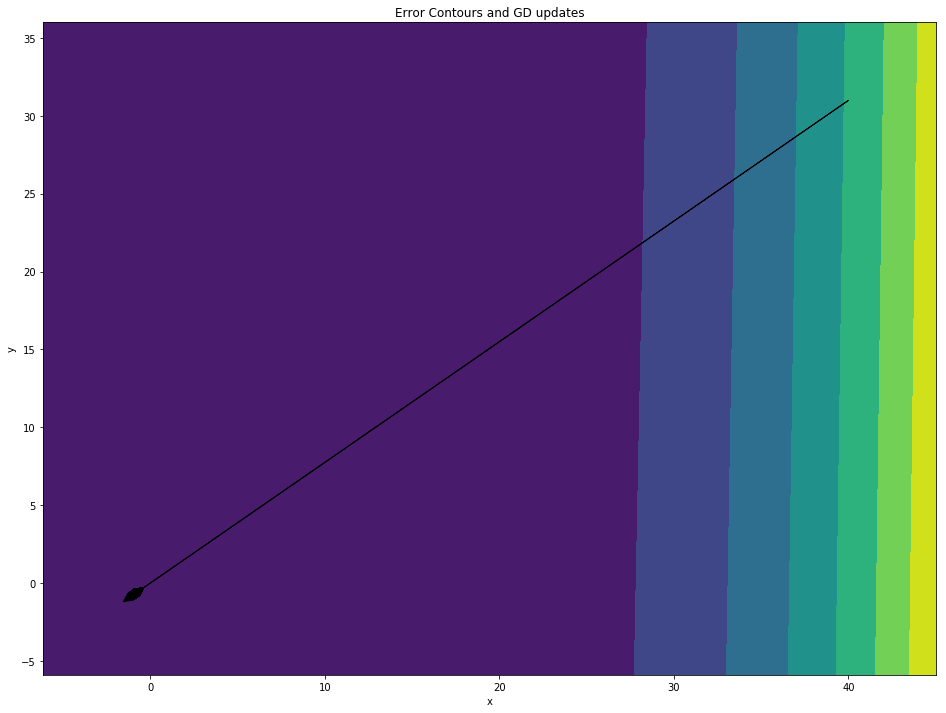

In [40]:
create_contour_plot(errors)

### Nesterov accelerated gradient

$\hat{\theta} = \theta_t + \alpha v_t$

$v_{t+1} = \alpha v_t - \eta \nabla_\theta f(\hat{\theta}) $

$\theta_{t+1} = \theta_t + v_{t+1}$

In [56]:
def gradient_descent_nesterov(eta, alpha, max_epochs=1000):
    counter = 0
    convergence = True
    
    x, y = np.random.randint(-100, 100, 2)
    J = 50.0/9 * (x**2 + y**2)**3 - 209.0/18 * (x**2 + y**2)**2 + 59.0/9 * (x**2 + y**2)
    delta_J = J
    
    v_x_old = 0
    v_y_old = 0
    
    print("Epoch {} - Error:{}, a:{}, b:{}".format(counter, J, x, y))
    
    errors = [(J, x, y)]
    while J > 0.001:
        x_d = x + alpha*v_x_old
        y_d = y + alpha*v_y_old
        
        d_J_x = 100.0/3 * x_d * (x_d**2 + y_d*2)**2 - 418.0/9 * x_d * (x_d**2 + y_d**2) + 118.0/9 * x_d
        d_J_y = 100.0/3 * y_d * (x_d**2 + y_d**2)**2 - 418.0/9 * y_d * (x_d**2 + y_d**2) + 118.0/9 * y_d
    
        v_x = alpha * v_x_old - eta * d_J_x
        v_y = alpha * v_y_old - eta * d_J_y
        
        x += v_x
        y += v_y
        
        J_new = 50.0/9 * (x**2 + y**2)**3 - 209.0/18 * (x**2 + y**2)**2 + 59.0/9 * (x**2 + y**2)
        delta_J = J - J_new
        
        J = J_new
        
        v_x_old = v_x
        v_y_old = v_y
        
        counter += 1
        
        if counter > max_epochs:
            convergence = False
            break
        
        if counter % 1000 == 0:
            errors.append((J, x, y))
            print("Epoch {} - Error:{}, a:{}, b:{}".format(counter, J, x, y))
    
    return convergence, errors

In [61]:
c, errors = gradient_descent_nesterov(5e-10, 0.98, 1000000)

Epoch 0 - Error:982471539.9999999, a:11, b:21
Epoch 1000 - Error:18342.20334438779, a:3.9401729939521184, b:0.26099749973280734
Epoch 2000 - Error:7162.695719855863, a:3.3966061301236956, b:0.22724158074791304
Epoch 3000 - Error:4013.9355748446806, a:3.1041549394478176, b:0.2091546242797347
Epoch 4000 - Error:2630.738795734112, a:2.9091618626860605, b:0.19713619938227092
Epoch 5000 - Error:1883.860966512148, a:2.7652743661024175, b:0.18829486545133206
Epoch 6000 - Error:1428.4388705199633, a:2.6525229673180224, b:0.18138648080144715
Epoch 7000 - Error:1127.402375920739, a:2.560567183159776, b:0.17576748796855468
Epoch 8000 - Error:916.6103408923734, a:2.483397368910493, b:0.17106421624143664
Epoch 9000 - Error:762.4778096493616, a:2.417229990875869, b:0.16704161213600321
Epoch 10000 - Error:645.905601219225, a:2.3595383091139115, b:0.16354282559429884
Epoch 11000 - Error:555.3211002560884, a:2.3085565281104725, b:0.16045832483475087
Epoch 12000 - Error:483.3501447585534, a:2.2630052947

Epoch 131000 - Error:6.583379383934556, a:1.337561837620425, b:0.10539677008206053
Epoch 132000 - Error:6.478681919467549, a:1.3354704563718995, b:0.10529842911358413
Epoch 133000 - Error:6.376288166661366, a:1.333399223286418, b:0.10520125493694364
Epoch 134000 - Error:6.276133030402322, a:1.3313477941065386, b:0.10510522715099631
Epoch 135000 - Error:6.178153692457398, a:1.3293158329388266, b:0.10501032585590496
Epoch 136000 - Error:6.08228951634346, a:1.3273030119908902, b:0.10491653163726902
Epoch 137000 - Error:5.988481956817154, a:1.3253090113185422, b:0.10482382555087062
Epoch 138000 - Error:5.8966744737294, a:1.323333518582614, b:0.10473218910800475
Epoch 139000 - Error:5.80681245000595, a:1.321376228815014, b:0.10464160426136887
Epoch 140000 - Error:5.718843113527722, a:1.3194368441935849, b:0.10455205339148738
Epoch 141000 - Error:5.632715462699757, a:1.3175150738253738, b:0.10446351929364434
Epoch 142000 - Error:5.548380195512065, a:1.3156106335379751, b:0.10437598516530684


Epoch 240000 - Error:1.7443990533606755, a:1.184012290569708, b:0.09894082179528703
Epoch 241000 - Error:1.7283683169581945, a:1.1830420699370585, b:0.09890638444491785
Epoch 242000 - Error:1.7125593589987194, a:1.1820769161265423, b:0.098872228912604
Epoch 243000 - Error:1.6969685318206569, a:1.1811167810214482, b:0.09883835242626722
Epoch 244000 - Error:1.6815922606108877, a:1.180161617153857, b:0.09880475225185904
Epoch 245000 - Error:1.6664270416787108, a:1.1792113776932887, b:0.09877142569268858
Epoch 246000 - Error:1.6514694407773867, a:1.1782660164356131, b:0.09873837008876525
Epoch 247000 - Error:1.6367160914714418, a:1.177325487792179, b:0.09870558281615578
Epoch 248000 - Error:1.6221636935485986, a:1.1763897467791844, b:0.09867306128635348
Epoch 249000 - Error:1.6078090114748367, a:1.1754587490072719, b:0.09864080294566303
Epoch 250000 - Error:1.5936488728909843, a:1.1745324506713273, b:0.09860880527459695
Epoch 251000 - Error:1.5796801671505012, a:1.1736108085405343, b:0.098

Epoch 350000 - Error:0.8018063002868416, a:1.1000148156834644, b:0.09640379388258231
Epoch 351000 - Error:0.7977876073308172, a:1.0994086011319002, b:0.0963892916032094
Epoch 352000 - Error:0.7938160576294928, a:1.098804509383721, b:0.09637490319912705
Epoch 353000 - Error:0.789891083089099, a:1.0982025264434472, b:0.09636062788345096
Epoch 354000 - Error:0.7860121236941922, a:1.0976026384459914, b:0.09634646487678959
Epoch 355000 - Error:0.782178627373014, a:1.0970048316551098, b:0.09633241340714993
Epoch 356000 - Error:0.7783900498651075, a:1.096409092461832, b:0.09631847270984838
Epoch 357000 - Error:0.7746458545916388, a:1.095815407382933, b:0.09630464202742135
Epoch 358000 - Error:0.7709455125281819, a:1.0952237630594281, b:0.0962909206095374
Epoch 359000 - Error:0.7672885020799027, a:1.0946341462550815, b:0.09627730771291092
Epoch 360000 - Error:0.7636743089592164, a:1.094046543854956, b:0.09626380260121652
Epoch 361000 - Error:0.760102426065675, a:1.0934609428639652, b:0.0962504

Epoch 455000 - Error:0.5595341975565411, a:1.0458305313725051, b:0.09538401722247793
Epoch 456000 - Error:0.5584166655840912, a:1.0453894526509306, b:0.0953782432337827
Epoch 457000 - Error:0.5573140004814485, a:1.0449495259965171, b:0.09537252901067848
Epoch 458000 - Error:0.5562260533537104, a:1.044510745500489, b:0.09536687422742585
Epoch 459000 - Error:0.555152676996765, a:1.0440731052966263, b:0.09536127856068558
Epoch 460000 - Error:0.554093725875064, a:1.0436365995608639, b:0.0953557416894972
Epoch 461000 - Error:0.5530490560996855, a:1.043201222510901, b:0.09535026329525438
Epoch 462000 - Error:0.552018525406794, a:1.042766968405811, b:0.09534484306168373
Epoch 463000 - Error:0.5510019931363717, a:1.042333831545659, b:0.09533948067482323
Epoch 464000 - Error:0.5499993202112821, a:1.0419018062711152, b:0.09533417582299941
Epoch 465000 - Error:0.5490103691166794, a:1.0414708869630942, b:0.09532892819680602
Epoch 466000 - Error:0.5480350038796624, a:1.041041068042367, b:0.09532373

Epoch 557000 - Error:0.5022583508264624, a:1.005913167638656, b:0.09505559366851737
Epoch 558000 - Error:0.5021079269875841, a:1.0055650922459725, b:0.09505457110276452
Epoch 559000 - Error:0.5019631360279995, a:1.0052177324426157, b:0.0950535844083333
Epoch 560000 - Error:0.501823926978366, a:1.0048710851953093, b:0.09505263342051455
Epoch 561000 - Error:0.5016902493619426, a:1.0045251474886823, b:0.09505171797559146
Epoch 562000 - Error:0.5015620531891667, a:1.0041799163251388, b:0.09505083791083307
Epoch 563000 - Error:0.5014392889522874, a:1.0038353887247087, b:0.0950499930644854
Epoch 564000 - Error:0.5013219076200919, a:1.003491561724937, b:0.09504918327576448
Epoch 565000 - Error:0.5012098606326703, a:1.0031484323807258, b:0.0950484083848486
Epoch 566000 - Error:0.5011030998962669, a:1.002805997764211, b:0.09504766823287128
Epoch 567000 - Error:0.5010015777781733, a:1.0024642549646345, b:0.09504696266191301
Epoch 568000 - Error:0.5009052471017243, a:1.0021232010882193, b:0.09504

Epoch 656000 - Error:0.508227490585031, a:0.9745081274959104, b:0.09510579142128915
Epoch 657000 - Error:0.5084482901849041, a:0.9742185523260448, b:0.09510765211651792
Epoch 658000 - Error:0.5086714165645443, a:0.9739294618214666, b:0.09510953620468973
Epoch 659000 - Error:0.5088968491064945, a:0.9736408542157096, b:0.0951114435908254
Epoch 660000 - Error:0.5091245673705957, a:0.9733527277511956, b:0.09511337418043049
Epoch 661000 - Error:0.5093545510922981, a:0.9730650806791645, b:0.09511532787949138
Epoch 662000 - Error:0.5095867801809719, a:0.972777911259622, b:0.09511730459447176
Epoch 663000 - Error:0.5098212347182383, a:0.9724912177612868, b:0.09511930423231098
Epoch 664000 - Error:0.5100578949563337, a:0.9722049984615222, b:0.09512132670041845
Epoch 665000 - Error:0.5102967413164743, a:0.9719192516462948, b:0.09512337190667337
Epoch 666000 - Error:0.5105377543872383, a:0.9716339756101092, b:0.0951254397594191
Epoch 667000 - Error:0.5107809149229885, a:0.9713491686559569, b:0.09

Epoch 753000 - Error:0.5379590970566026, a:0.9484429402551743, b:0.0953826850461533
Epoch 754000 - Error:0.5383308455630784, a:0.9481932879654131, b:0.09538643429453156
Epoch 755000 - Error:0.538703547540047, a:0.9479439831762085, b:0.09539019957758607
Epoch 756000 - Error:0.5390771937457215, a:0.9476950247688503, b:0.0953939808353952
Epoch 757000 - Error:0.5394517750115231, a:0.9474464116295324, b:0.09539777800830096
Epoch 758000 - Error:0.5398272822414318, a:0.9471981426493432, b:0.09540159103690725
Epoch 759000 - Error:0.54020370641138, a:0.9469502167242235, b:0.09540541986207861
Epoch 760000 - Error:0.5405810385686269, a:0.9467026327549433, b:0.09540926442493773
Epoch 761000 - Error:0.5409592698311414, a:0.9464553896470771, b:0.09541312466686501
Epoch 762000 - Error:0.541338391387014, a:0.9462084863109709, b:0.09541700052949716
Epoch 763000 - Error:0.5417183944938335, a:0.9459619216617235, b:0.0954208919547242
Epoch 764000 - Error:0.5420992704781122, a:0.945715694619149, b:0.095424

Epoch 854000 - Error:0.5790362392728161, a:0.9248145718282511, b:0.0958333140712975
Epoch 855000 - Error:0.579467652472708, a:0.9245950859190443, b:0.09583841858082201
Epoch 856000 - Error:0.5798993707921589, a:0.9243758553612892, b:0.09584353418446517
Epoch 857000 - Error:0.5803313899950249, a:0.9241568794183858, b:0.09584866084262847
Epoch 858000 - Error:0.5807637058769854, a:0.9239381573565926, b:0.0958537985158636
Epoch 859000 - Error:0.5811963142652781, a:0.9237196884450122, b:0.09585894716487231
Epoch 860000 - Error:0.5816292110184627, a:0.9235014719555821, b:0.09586410675050544
Epoch 861000 - Error:0.5820623920261614, a:0.9232835071630549, b:0.09586927723376248
Epoch 862000 - Error:0.5824958532088313, a:0.923065793344988, b:0.09587445857578948
Epoch 863000 - Error:0.5829295905175167, a:0.9228483297817233, b:0.09587965073787974
Epoch 864000 - Error:0.5833635999335964, a:0.9226311157563858, b:0.0958848536814723
Epoch 865000 - Error:0.5837978774685793, a:0.9224141505548511, b:0.095

Epoch 962000 - Error:0.6266732589956945, a:0.9024490128905864, b:0.09644134678049511
Epoch 963000 - Error:0.6271185101760031, a:0.9022533645840656, b:0.09644744768458707
Epoch 964000 - Error:0.6275637513713228, a:0.9020579060821075, b:0.09645355613911534
Epoch 965000 - Error:0.6280089806869968, a:0.901862636889177, b:0.09645967211705767
Epoch 966000 - Error:0.6284541962423882, a:0.9016675565114525, b:0.09646579559147958
Epoch 967000 - Error:0.6288993961707341, a:0.9014726644568253, b:0.09647192653553494
Epoch 968000 - Error:0.6293445786190954, a:0.9012779602348774, b:0.09647806492246466
Epoch 969000 - Error:0.629789741748227, a:0.9010834433568858, b:0.09648421072559746
Epoch 970000 - Error:0.6302348837324887, a:0.9008891133358065, b:0.09649036391834848
Epoch 971000 - Error:0.6306800027597355, a:0.9006949696862748, b:0.09649652447421893
Epoch 972000 - Error:0.6311250970312345, a:0.9005010119245926, b:0.09650269236679646
Epoch 973000 - Error:0.6315701647615493, a:0.9003072395687234, b:0.

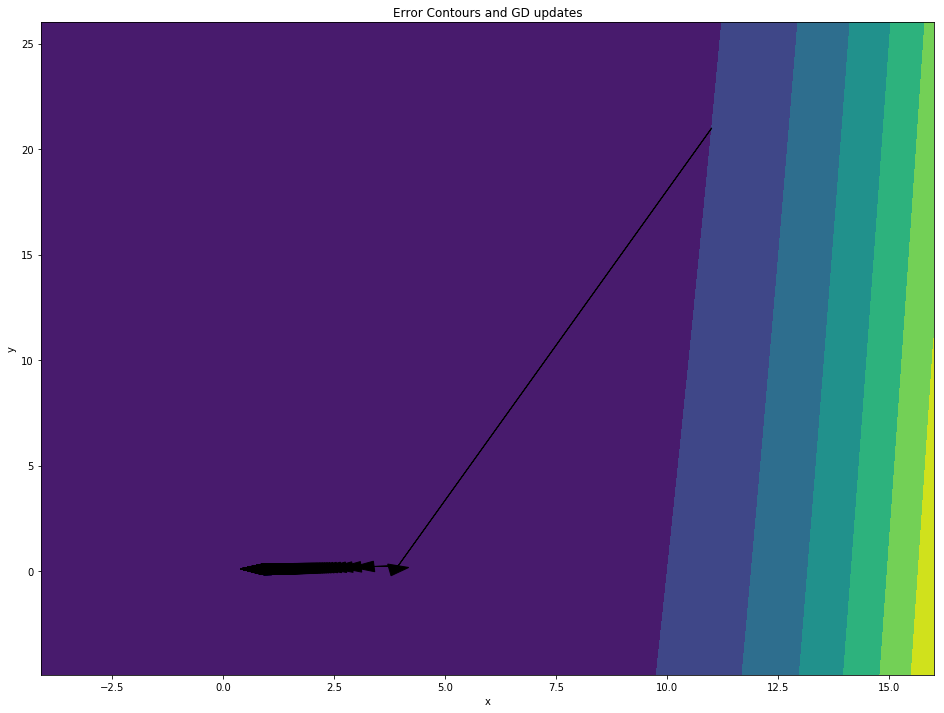

In [62]:
create_contour_plot(errors)

### Adam optimizer

$m_t = \beta_1 m_{t-1} + (1-\beta_1)\nabla_\theta f(\theta_t)$

$v_t = \beta_2 v_{t-1} + (1-\beta_2)\nabla_\theta f(\theta_t)^2$

$\hat{m}_t = \frac{m_t}{1-\beta_1^t}$

$\hat{v}_t = \frac{v_t}{1-\beta_2^t}$

$\theta_t = \theta_{t-1} - \eta \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$

In [63]:
def gradient_descent_adam(eta, beta_1, beta_2, max_epochs=1000):
    counter = 1
    convergence = True
    
    x, y = np.random.randint(-100, 100, 2)
    J = 50.0/9 * (x**2 + y**2)**3 - 209.0/18 * (x**2 + y**2)**2 + 59.0/9 * (x**2 + y**2)
    delta_J = J
    
    m_x_old = 0
    m_y_old = 0
    v_x_old = 0
    v_y_old = 0
    
    print("Epoch {} - Error:{}, a:{}, b:{}".format(counter, J, x, y))
    
    errors = [(J, x, y)]
    while J > 0.001:
        d_J_x = 100.0/3 * x * (x**2 + y**2)**2 - 418.0/9 * x * (x**2 + y**2) + 118.0/9 * x
        d_J_y = 100.0/3 * y * (x**2 + y**2)**2 - 418.0/9 * y * (x**2 + y**2) + 118.0/9 * y
    
        m_x = beta_1 * m_x_old + (1 - beta_1)* d_J_x
        v_x = beta_2 * v_x_old + (1 - beta_2)* d_J_x**2
        
        m_y = beta_1 * m_y_old + (1 - beta_1)* d_J_y
        v_y = beta_2 * v_y_old + (1 - beta_2)* d_J_y**2
        
        m_hat_x = m_x / (1 - beta_1**counter)
        v_hat_x = v_x / (1 - beta_2**counter)
        
        m_hat_y = m_y / (1 - beta_1**counter)
        v_hat_y = v_y / (1 - beta_2**counter)
        
        x -= eta * m_hat_x /(np.sqrt(v_hat_x) + 1e-10)
        y -= eta * m_hat_y /(np.sqrt(v_hat_y) + 1e-10)
        
        J_new = 50.0/9 * (x**2 + y**2)**3 - 209.0/18 * (x**2 + y**2)**2 + 59.0/9 * (x**2 + y**2)
        delta_J = J - J_new
        
        J = J_new
        
        v_x_old = v_x
        v_y_old = v_y
        
        counter += 1
        
        if counter > max_epochs:
            convergence = False
            break
        
        if counter % 1000 == 0:
            errors.append((J, x, y))
            print("Epoch {} - Error:{}, a:{}, b:{}".format(counter, J, x, y))
    
    errors.append((J, x, y))
    print("Epoch {} - Error:{}, a:{}, b:{}".format(counter, J, x, y))
    
    return convergence, errors

In [64]:
c, errors = gradient_descent_adam(1e-2, 0.9, 0.999, 500000)

Epoch 1 - Error:11846636696191.11, a:-74, b:-86
Epoch 1000 - Error:10979849435050.246, a:-72.98787116572942, b:-84.98745417333917
Epoch 2000 - Error:10203188106969.885, a:-72.02302678757614, b:-84.02155211313213
Epoch 3000 - Error:9482415266534.203, a:-71.07136721838856, b:-83.06841995234343
Epoch 4000 - Error:8809862886256.734, a:-70.12743355347033, b:-82.12275231734638
Epoch 5000 - Error:8180390432908.747, a:-69.18791285575305, b:-81.18133159785067
Epoch 6000 - Error:7590434558384.458, a:-68.25097552285126, b:-80.24238273615043
Epoch 7000 - Error:7037328655410.896, a:-67.3156868041897, b:-79.30499983152647
Epoch 8000 - Error:6518891907961.952, a:-66.38160033113354, b:-78.36875049660901
Epoch 9000 - Error:6033209069215.365, a:-65.44851768900331, b:-77.43344222829481
Epoch 10000 - Error:5578521679075.25, a:-64.51636008082394, b:-76.49899795052347
Epoch 11000 - Error:5153176959438.085, a:-63.58510447024113, b:-75.56539422173299
Epoch 12000 - Error:4755604248862.363, a:-62.65475333761139

Epoch 107000 - Error:184.29571462906546, a:-9.006085483620789e-20, b:-1.9833723824715346
Epoch 108000 - Error:86.0413941933671, a:-1.2383966348216544e-21, b:-1.7940145810279884
Epoch 109000 - Error:39.12574135793909, a:-1.802069658383241e-23, b:-1.6274151027080073
Epoch 110000 - Error:17.298554090428667, a:-2.993639521694604e-25, b:-1.4824784752511706
Epoch 111000 - Error:7.453597120999904, a:-6.1686362609246225e-27, b:-1.3581610258485177
Epoch 112000 - Error:3.186647602048941, a:-1.726371098612952e-28, b:-1.2535396349553332
Epoch 113000 - Error:1.437492473075352, a:-7.242132540535499e-30, b:-1.1678834003102154
Epoch 114000 - Error:0.7788958500789995, a:-5.0590738236887235e-31, b:-1.100711382944866
Epoch 115000 - Error:0.5636606896130214, a:-6.533000569018824e-32, b:-1.0517557681481777
Epoch 116000 - Error:0.5091248130883006, a:-1.6847303442014456e-32, b:-1.0205617995429734
Epoch 117000 - Error:0.5005582908491846, a:-8.51627845206567e-33, b:-1.0052108269060378
Epoch 118000 - Error:0.50

Epoch 217000 - Error:0.5000003417726218, a:-2.2072654006804105e-31, b:-1.0001299762330922
Epoch 218000 - Error:0.5000145325528607, a:-2.5863460777627655e-116, b:-1.0008465817436945
Epoch 219000 - Error:0.5000057953985095, a:4.758930865423457e-179, b:-1.0005348794261948
Epoch 220000 - Error:0.5000248482515897, a:-1.6643313228836266e-24, b:-1.0011065359362867
Epoch 221000 - Error:0.500003932059804, a:4.254712698168899e-99, b:-1.0004406458682562
Epoch 222000 - Error:0.5000103210644369, a:1.8260111748091948e-191, b:-1.0007135960900018
Epoch 223000 - Error:0.5000003368498005, a:-1.6126458677876245e-07, b:-1.0001290369564142
Epoch 224000 - Error:0.5000003323827933, a:-3.3353401203064327e-72, b:-1.0001281786893756
Epoch 225000 - Error:0.5000103890391658, a:2.8458598309148113e-155, b:-1.0007159394317915
Epoch 226000 - Error:0.5000049315585784, a:4.8114140958733723e-135, b:-1.000493440848949
Epoch 227000 - Error:0.50000718877771, a:-2.399801350302657e-39, b:-1.000595661574196
Epoch 228000 - Err

Epoch 329000 - Error:0.5000040873725311, a:-1.9742756515496857e-111, b:-1.000449257957586
Epoch 330000 - Error:0.5000001496880371, a:-1.1718556543199024e-37, b:-1.0000860239489808
Epoch 331000 - Error:0.5000006866788933, a:-2.648029428985389e-105, b:-1.0001842190340837
Epoch 332000 - Error:0.5000043296002401, a:2.1122946391922035e-180, b:-1.0004623687425798
Epoch 333000 - Error:0.5000002861846777, a:-2.8744080658636916e-08, b:-1.0001189395154486
Epoch 334000 - Error:0.5000028499487597, a:1.1824320687187285e-77, b:-1.000375183395443
Epoch 335000 - Error:0.5000016810694126, a:-2.9627534607403652e-164, b:-1.0002881895939193
Epoch 336000 - Error:0.5000000180620043, a:-1.0187742762738864e-08, b:-1.0000298846225795
Epoch 337000 - Error:0.5000063860538866, a:4.84784135246266e-62, b:-1.0005614512963354
Epoch 338000 - Error:0.5000028708970374, a:2.7502259948405874e-138, b:-1.000376558918012
Epoch 339000 - Error:0.5000086402621955, a:1.5126675056222379e-167, b:-1.0006529737843033
Epoch 340000 - 

Epoch 442000 - Error:0.5000004976640824, a:-3.2309023369995153e-50, b:-1.0001568356584785
Epoch 443000 - Error:0.5000011725868552, a:2.026032077922317e-123, b:-1.0002407082327678
Epoch 444000 - Error:0.5000021746864132, a:3.184632530429842e-179, b:-1.0003277602808074
Epoch 445000 - Error:0.5000001651485988, a:-1.0038083183474383e-17, b:-1.0000903566808261
Epoch 446000 - Error:0.5000009006341983, a:-6.813800326558439e-86, b:-1.0002109664032441
Epoch 447000 - Error:0.5000027495729222, a:3.1195114648520795e-159, b:-1.000368521074809
Epoch 448000 - Error:0.5000047345245999, a:-1.535057335778105e-21, b:-1.0004834906678786
Epoch 449000 - Error:0.5000030240064355, a:-2.362157380722551e-61, b:-1.0003864636124777
Epoch 450000 - Error:0.5000013206942917, a:1.422552154092301e-140, b:-1.0002554520245779
Epoch 451000 - Error:0.5000022291449753, a:4.098651447157723e-153, b:-1.000331836634483
Epoch 452000 - Error:0.500000068873935, a:-8.045607894395432e-25, b:-1.0000583542494634
Epoch 453000 - Error:

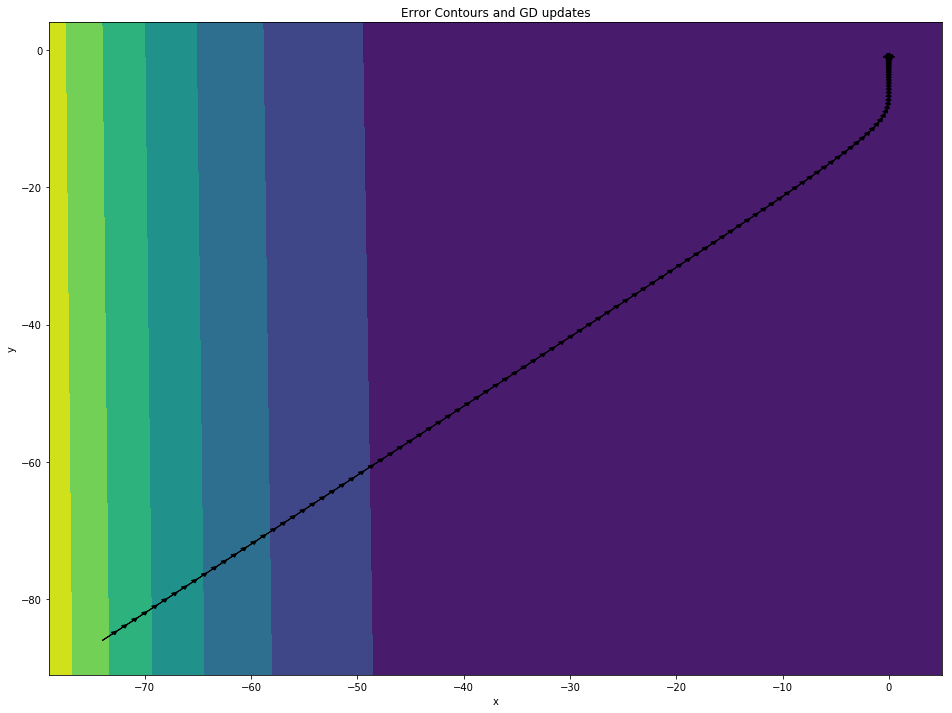

In [65]:
create_contour_plot(errors)